## GEOG0115 - 2020 Autumn Term

## Introduction to Social and Geographical Data Science
Stephen Law and Mateo Neira

### Coursework

We will use the dataset provided by NYC Department of Finance that contains rolling sales list of properties that have been sold in the last twelve-month period in New York City. The Dataset has been provided as part of this notebook, and additional information can be found at: [New York City Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page).

**Aims**
What can we discover about New York City real estate market by using a years worth of transactions? Are there any spatial patterns that can be extracted from the data? Can we build a machine learning model that predicts sale value for unseen data points?

**Data**:
The dataset consists of property sales table which contains:
* BOROUGH: ID of borough in which the property is located.
* BOROUGH_NAME: Name of the borough in which the property is located.
* NEIGHBOURHOOD: Neighborhood name determined by the Department of Finance.
* BUILDING CLASS CATEGORY: Broad usage of property (e.g. One Family Homes).
* TAX CLASS AT PRESENT: Tax class of property (there are 4 classes), see [glossary](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) for more details.
* BLOCK: Tax block on which the property is located.
* LOT: Tax lot on which the property is located. represents the properties unique location. 
* EASE-MENT: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property.
* BUILDING CLASS AT PRESENT: Properties constructive use. see [Building classification](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html) for more details.
* ADDRESS: The street address of the property.
* ZIP CODE: The property's postal code.
* RESIDENTIAL UNITS: The number of residential units at the listed property.
* COMMERCIAL UNITS: The number of commercial units at the listed property.
* TOTAL UNITS: The total number of units at the listed property.
* LAND SQUARE FEET: The land area of the property listed.
* GROSS SQUARE FEET: The total area of all the floors of a building.
* YEAR BUILT: Year the structure of the property was built.
* TAX CLASS AT TIME OF SALE: Tax class of property (there are 4 classes), see [glossary](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) for more details.
* BUILDING CLASS AT TIME OF SALE: Properties constructive use. see [Building classification](https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html) for more details.
* SALE PRICE : Price paid for the property. A $0 sale indicates that there was a transfer of ownership without a cash consideration. 
* SALE DATE: Date the property sold.

This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.
    
Additionally we have provided Tax Lot geometries, the original data can be found [here](https://www1.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page), as well as ZIP code boundary data, taken from [here](https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u).

**Tasks**:

## 1.  Load and clean the price listing dataset.
Most real datasets require a lot of data cleaning, removal of invalid data, missing values, duplicates and outliers. Complete the following tasks.

* Converting fields to the right data type. 
* Clean and check quality of the data
* Remove unnecessary columns from the dataset. 
* Remove missing values.
* Remove duplicate data.
* Remove outliers: 
    * Think about which attributes you will use / focus on, check  data distribution. Are there values that seem too low, or too high? check these datapoints and determine if they are outliers.
    * For example: check the ' sale price ' and 'price per gross floor area' attribute, we know that values that are equal to zero are property transfers and will need to be removed for our analysis. 
    * does a property that is sold for too low or too high make any sense? (eg. $1000)

        
## 2.  Describe and Explore the dataset (EDA)
Describe the cleaned dataset, merged with the spatial coordinates and explore the dataset. Do you notice any spatial patterns? 

* Describe and explore the dataset (EDA).
* Add spatial component to the dataset by merging the Tax Lot dataset with x,y coordinates using the bb1_code column (borough, block, and lot column).
* Visualize the dataset geographically.
* Are there any spatial autocorrelation in the 'sale price' of the data?
    
## 3. Build a simple linear predictive model for target price. 
Build a linear predictive model, report and discuss the results.

* transforms the skewed data. 
* train a linear regression model with relevant features where the target is predicted sales price.
* apply kfold cross validation (k=3)
* report MSE and adjR2 on each fold holdout testset and discuss the results. 
* report the coefficients for the linear regression model.
* visualise geographically observed sale price and final predicted sale price
    
## 4. Conduct one of the following;

### 4a. Second Regression model
* construct a second regression model (eg. model of your choice) where the target is the predicted sale price. 
* compare the results of the linear regression model results with the second regression model on a random holdout testset.
* report the results
    
### 4b. Principal Component Regression model
* apply PCA analysis to find sets of uncorrelated features. 
* train a principal component regression model where the target is the predicted sale price. 
* compare the results between the linear regression model results with the principal component regression results on a random holdout testset. 
* report the results


**Reporting**

Students have to submit a report containing a description of the results in PDF format, font size 11 or 12 points. The report should have a maximum length of 2500 words including title, introduction, conclusion, captions and excluding bibliography at the end, etc. The maximum number of figures is 10 in total (subfigures are allowed). 
The code developed by the student should be submitted using a separate link available on Moodle in a ZIP file for code submission. The code can be submitted as Jupyter worksheet(s) or as a .py files. You need to compress your code using a single ZIP file. Detailed instructions for the submission will also be available on Moodle.


In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [2]:
# suppress warning 
import warnings
warnings.filterwarnings(action='ignore')

## 1. Load and clean the price listing dataset

* Setting the right types for each column.
* Clean and check quality of the data
* Remove unecessary columns
* Remove missing values
* Remove Duplicates
* Remove outliers

**initial size**: 64,355 data points before cleaning (small dataset)

In [3]:
#load dataset
df = pd.read_csv('data/rolling_sales_ny_2020_small.csv')

In [4]:
len(df)

64400

In [5]:
# create a copy of the original dataset and clean the dataset
subset = df.copy()
data1 = subset.drop_duplicates()
len(data1)

64355

In [6]:
data1.describe()

BOROUGH         BLOCK           LOT  EASE-MENT      ZIP CODE  \
count  64355.000000  64355.000000  64355.000000        0.0  64355.000000   
mean       3.034434   4435.069163    363.595696        NaN  10872.457975   
std        1.266147   3660.549719    665.181939        NaN    554.871581   
min        1.000000      1.000000      1.000000        NaN  10001.000000   
25%        2.000000   1367.000000     22.000000        NaN  10308.000000   
50%        3.000000   3582.000000     50.000000        NaN  11211.000000   
75%        4.000000   6587.000000    360.000000        NaN  11358.000000   
max        5.000000  16350.000000   9116.000000        NaN  11697.000000   

       COMMERCIAL UNITS    YEAR BUILT  TAX CLASS AT TIME OF SALE      bbl_code  
count      39641.000000  59761.000000               64355.000000  6.435500e+04  
mean           0.641053   1950.825020                   1.609696  3.078785e+10  
std            9.834854     35.078583                   0.800872  1.281760e+10  
min          -16.000000   1800.000000                   1.000000  1.000080e+10  
25%            0.000000   1925.000000                   1.000000  2.044600e+10  
50%            0.000000   1945.000000                   1.000000  3.065510e+10  
75%            0.000000   1971.000000                   2.000000  4.070740e+10  
max          259.000000   2020.000000                   4.000000  5.080500e+10

In [7]:
#read the data set
df2 = pd.read_csv('data/pluto_subset_small.csv')
len(df2)

39542

In [8]:
subset2 = df2.copy()
# filter out duplicates
data2 = subset2.drop_duplicates()
len(data2)
data2.describe()

bbl_code      latitude     longitude
count  3.954200e+04  39512.000000  39512.000000
mean   3.455487e+10     40.694455    -73.921550
std    1.098696e+10      0.086671      0.118741
min    1.000100e+10     40.498632    -74.255413
25%    3.018353e+10     40.628962    -73.980316
50%    4.007225e+10     40.687262    -73.911386
75%    4.109160e+10     40.750894    -73.835451
max    5.080500e+10     40.912508    -73.700418

In [9]:
data2.rename(columns={'latitude':'LATITUDE','longitude':'LONGITUDE'}, inplace = True)

In [10]:
# merge the two dataframe using 'bb1_code'
data = data1.merge(data2, on = 'bbl_code')
len(data)
data.head()

BOROUGH NEIGHBORHOOD  BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
1        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
2        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3030   
3        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3039   
4        2     BATHGATE  01 ONE FAMILY DWELLINGS                    1   3039   

   LOT  EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0   65        NaN                        A1        4455 PARK AVENUE   
1   67        NaN                        A1        4451 PARK AVENUE   
2   67        NaN                        A1        4451 PARK AVENUE   
3   29        NaN                        A9  2327 WASHINGTON AVENUE   
4   29        NaN                        A9     2327 WASHINGTON AVE   

  APARTMENT NUMBER  ...  GROSS SQUARE FEET YEAR BUILT  \
0              NaN  ...              1,587     1899.0   
1              NaN  ...              1,495     1899.0   
2              NaN  ...              1,495     1899.0   
3              NaN  ...              1,260     1910.0   
4              NaN  ...              1,260     1910.0   

   TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE   \
0                        1.0                             A1      458,000   
1                        1.0                             A1      475,000   
2                        1.0                             A1      275,000   
3                        1.0                             A9      110,000   
4                        1.0                             A9      165,000   

    SALE DATE  BOROUGH_NAME     bbl_code   LATITUDE  LONGITUDE  
0  31/01/2020         Bronx  20303000065  40.854025 -73.896208  
1  23/07/2020         Bronx  20303000067  40.853938 -73.896263  
2  16/03/2020         Bronx  20303000067  40.853938 -73.896263  
3  06/12/2019         Bronx  20303900029  40.856048 -73.892731  
4  02/03/2020         Bronx  20303900029  40.856048 -73.892731  

[5 rows x 25 columns]

In [11]:
# check columns
data.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       ' SALE PRICE ', 'SALE DATE', 'BOROUGH_NAME', 'bbl_code', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

In [12]:
# observe the unique values
data["BOROUGH_NAME"].unique()
data["BOROUGH"].unique()
data["TAX CLASS AT PRESENT"].unique()
data["TAX CLASS AT TIME OF SALE"].unique()
data["BUILDING CLASS AT TIME OF SALE"].unique()
data["BUILDING CLASS AT PRESENT"].unique()
data["BUILDING CLASS CATEGORY"].unique()

array(['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS',
       '03 THREE FAMILY DWELLINGS', '05 TAX CLASS 1 VACANT LAND',
       '07 RENTALS - WALKUP APARTMENTS',
       '08 RENTALS - ELEVATOR APARTMENTS', '22 STORE BUILDINGS',
       '29 COMMERCIAL GARAGES', '30 WAREHOUSES',
       '31 COMMERCIAL VACANT LAND', '37 RELIGIOUS FACILITIES',
       '40 SELECTED GOVERNMENTAL FACILITIES', '41 TAX CLASS 4 - OTHER',
       '10 COOPS - ELEVATOR APARTMENTS', '27 FACTORIES',
       '09 COOPS - WALKUP APARTMENTS', '14 RENTALS - 4-10 UNIT',
       '21 OFFICE BUILDINGS', '32 HOSPITAL AND HEALTH FACILITIES',
       '06 TAX CLASS 1 - OTHER', '36 OUTDOOR RECREATIONAL FACILITIES',
       '39 TRANSPORTATION FACILITIES', '38 ASYLUMS AND HOMES',
       '33 EDUCATIONAL FACILITIES',
       '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '34 THEATRES',
       '15 CONDOS - 2-10 UNIT RESIDENTIAL', '26 OTHER HOTELS',
       '04 TAX CLASS 1 CONDOS', '13 CONDOS - ELEVATOR APARTMENTS',
       '44 CONDO PARKING', '

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import contextily as ctx

In [14]:
# data with useful information
A = data[['BOROUGH','BLOCK','LOT','RESIDENTIAL UNITS','TOTAL UNITS',
          'ZIP CODE', 'COMMERCIAL UNITS','BUILDING CLASS CATEGORY',
          'LAND SQUARE FEET', 'GROSS SQUARE FEET', 
          'YEAR BUILT','TAX CLASS AT TIME OF SALE',' SALE PRICE ',
          'LATITUDE','LONGITUDE']]

In [15]:
A.head()
A.dtypes

BOROUGH                        int64
BLOCK                          int64
LOT                            int64
RESIDENTIAL UNITS             object
TOTAL UNITS                   object
ZIP CODE                     float64
COMMERCIAL UNITS             float64
BUILDING CLASS CATEGORY       object
LAND SQUARE FEET              object
GROSS SQUARE FEET             object
YEAR BUILT                   float64
TAX CLASS AT TIME OF SALE    float64
 SALE PRICE                   object
LATITUDE                     float64
LONGITUDE                    float64
dtype: object

In [16]:
# transformation of data type
A['BUILDING CLASS CATEGORY']=A['BUILDING CLASS CATEGORY'].apply(lambda x:x[0:2]).tolist()
A['GROSS SQUARE FEET'] = A['GROSS SQUARE FEET'].str.replace(",","")
A[' SALE PRICE '] = A[' SALE PRICE '].str.replace(",","")
A['LAND SQUARE FEET'] = A['LAND SQUARE FEET'].str.replace(",","")
A['RESIDENTIAL UNITS'] = A['RESIDENTIAL UNITS'].str.replace(",","")
A['TOTAL UNITS'] = A['TOTAL UNITS'].str.replace(",","")
A[' SALE PRICE '] = A[' SALE PRICE '].astype("float64")
A['GROSS SQUARE FEET'] = A['GROSS SQUARE FEET'].astype("float64")
A['LAND SQUARE FEET'] = A['LAND SQUARE FEET'].astype("float64")
A['RESIDENTIAL UNITS'] = A['RESIDENTIAL UNITS'].astype("float64")
A['TOTAL UNITS'] = A['TOTAL UNITS'].astype("float64")
A['BUILDING CLASS CATEGORY'] = A['BUILDING CLASS CATEGORY'].astype("float64")

In [17]:
A.dtypes
len(A)

49219

In [18]:
A.describe()

BOROUGH         BLOCK           LOT  RESIDENTIAL UNITS  \
count  49219.000000  49219.000000  49219.000000       17412.000000   
mean       3.249660   5054.841626     61.018164           4.011601   
std        1.177734   3727.614038    136.059199          68.161723   
min        1.000000      1.000000      1.000000           0.000000   
25%        3.000000   1769.000000     16.000000           1.000000   
50%        3.000000   4575.000000     36.000000           2.000000   
75%        4.000000   7317.000000     60.000000           3.000000   
max        5.000000  16350.000000   4143.000000        8764.000000   

        TOTAL UNITS      ZIP CODE  COMMERCIAL UNITS  BUILDING CLASS CATEGORY  \
count  17413.000000  49219.000000      37854.000000             49219.000000   
mean       5.153161  10939.440643          0.626988                 5.340986   
std       69.877614    523.182297         10.063599                 6.490547   
min        0.000000  10001.000000          0.000000                 1.000000   
25%        1.000000  10453.000000          0.000000                 1.000000   
50%        2.000000  11217.000000          0.000000                 2.000000   
75%        3.000000  11368.000000          0.000000                10.000000   
max     8812.000000  11697.000000        259.000000                44.000000   

       LAND SQUARE FEET  GROSS SQUARE FEET    YEAR BUILT  \
count      3.785300e+04       3.785500e+04  47664.000000   
mean       1.917990e+04       6.772749e+03   1942.168429   
std        1.131218e+06       7.556253e+04     28.540360   
min        2.400000e+01       0.000000e+00   1800.000000   
25%        2.000000e+03       1.352000e+03   1920.000000   
50%        2.500000e+03       1.920000e+03   1935.000000   
75%        4.000000e+03       2.750000e+03   1960.000000   
max        2.147557e+08       8.942176e+06   2020.000000   

       TAX CLASS AT TIME OF SALE   SALE PRICE       LATITUDE     LONGITUDE  
count               49219.000000  4.921900e+04  49188.000000  49188.000000  
mean                    1.447652  1.148264e+06     40.702213    -73.919855  
std                     0.752525  1.000763e+07      0.085731      0.113154  
min                     1.000000  0.000000e+00     40.498632    -74.255413  
25%                     1.000000  0.000000e+00     40.635820    -73.978133  
50%                     1.000000  3.953590e+05     40.697649    -73.915718  
75%                     2.000000  7.800000e+05     40.758289    -73.839725  
max                     4.000000  9.780904e+08     40.912508    -73.700418

In [19]:
# extract data to make gdf.plot map
Amap = A[['GROSS SQUARE FEET',' SALE PRICE ',
          'BOROUGH','LATITUDE','LONGITUDE']]

In [20]:
# filter out missing data; invalid data
Amap.isnull().sum()
Amap = Amap.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Amap = Amap[Amap['GROSS SQUARE FEET']>10]
Amap = Amap[Amap[' SALE PRICE ']>10]
len(Amap)

20574

In [21]:
# filter out outliers
Amap['price'] = Amap[' SALE PRICE ']/Amap['GROSS SQUARE FEET']
df2000 = Amap[Amap['price']>100]
df2000 = Amap[Amap['price']<2000]
df2000.describe()

GROSS SQUARE FEET   SALE PRICE        BOROUGH      LATITUDE  \
count       2.032000e+04  2.032000e+04  20320.000000  20320.000000   
mean        9.018604e+03  1.731220e+06      3.551329     40.690223   
std         9.911063e+04  1.375961e+07      1.021942      0.089047   
min         2.470000e+02  2.000000e+01      1.000000     40.498632   
25%         1.358000e+03  5.250000e+05      3.000000     40.623782   
50%         1.860000e+03  7.188440e+05      4.000000     40.682993   
75%         2.600000e+03  9.990000e+05      4.000000     40.743589   
max         8.942176e+06  9.780904e+08      5.000000     40.912271   

          LONGITUDE         price  
count  20320.000000  20320.000000  
mean     -73.919591    438.759061  
std        0.128145    244.251556  
min      -74.252319      0.002033  
25%      -73.982771    293.962163  
50%      -73.899962    403.324685  
75%      -73.823079    537.974684  
max      -73.700418   1995.073892

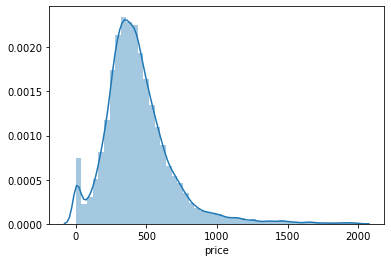

In [22]:
sns.distplot(df2000['price'])
plt.show()

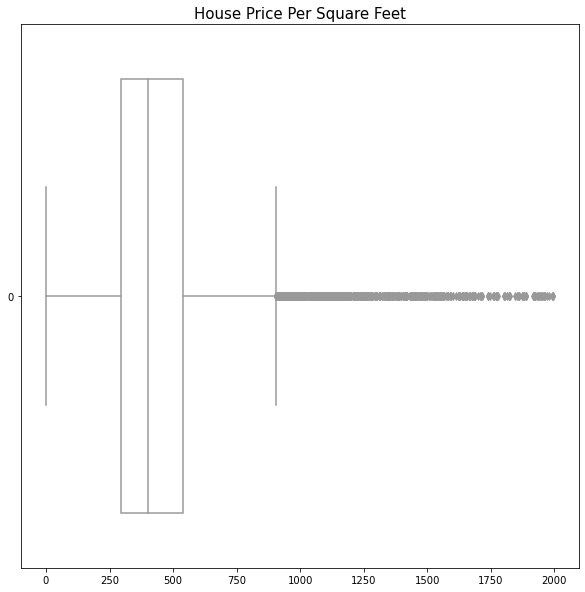

In [23]:
plt.figure(figsize = (10, 10))
plt.title('House Price Per Square Feet',fontsize=15)
sns.boxplot(data=df2000['price'],orient='h', color='white')
plt.show()

In [24]:
# unit house price data for every borough
dfManhattan=df2000[df2000['BOROUGH']==1]
dfBronx=df2000[df2000['BOROUGH']==2]
dfBrooklyn=df2000[df2000['BOROUGH']==3]
dfQueens=df2000[df2000['BOROUGH']==4]
dfStaten=df2000[df2000['BOROUGH']==5]
len(dfBronx)
len(dfBrooklyn)
len(dfManhattan)
len(dfQueens)
len(dfStaten)

3640

In [25]:
def price_borough(dfBorough, self):
    dfBorough = dfBorough[0:599]
    dfBorough['ID'] = range(1,600)
    dfBorough=dfBorough[['price','ID']]
    dfBorough.columns=[self,'ID']
    return dfBorough

In [26]:
dfBronx = price_borough(dfBronx,'Bronx')
dfManhattan = price_borough(dfManhattan,'Manhattan')
dfBrooklyn = price_borough(dfBrooklyn,'Brooklyn')
dfQueens = price_borough(dfQueens,'Queens')
dfStaten = price_borough(dfStaten,'Staten')

In [27]:
d = dfBronx.merge(dfManhattan, on='ID')
d = d.merge(dfBrooklyn, on='ID')
d = d.merge(dfQueens, on='ID')
d = d.merge(dfStaten, on='ID')

In [28]:
d

Bronx   ID    Manhattan    Brooklyn      Queens      Staten
0    288.594833    1  1410.505837  318.627451  477.589052  272.120787
1    317.725753    2   144.439095  594.537815  547.385621  174.418605
2    183.946488    3  1246.061300  570.054945  266.666667  429.623568
3     87.301587    4     0.188708  564.102564  444.049734  258.899676
4    130.952381    5     0.188708  540.465632  333.570413  302.432610
..          ...  ...          ...         ...         ...         ...
594  552.884615  595   231.489362  401.785714  727.590221  234.497608
595  493.250260  596   237.552261  440.705128  493.827160  185.779817
596  245.853081  597   720.000000  440.705128  441.290323  183.949504
597  295.622513  598  1088.965007  754.716981  476.635514  143.403442
598  512.820513  599  1538.461538  492.815584  428.449617  233.333333

[599 rows x 6 columns]

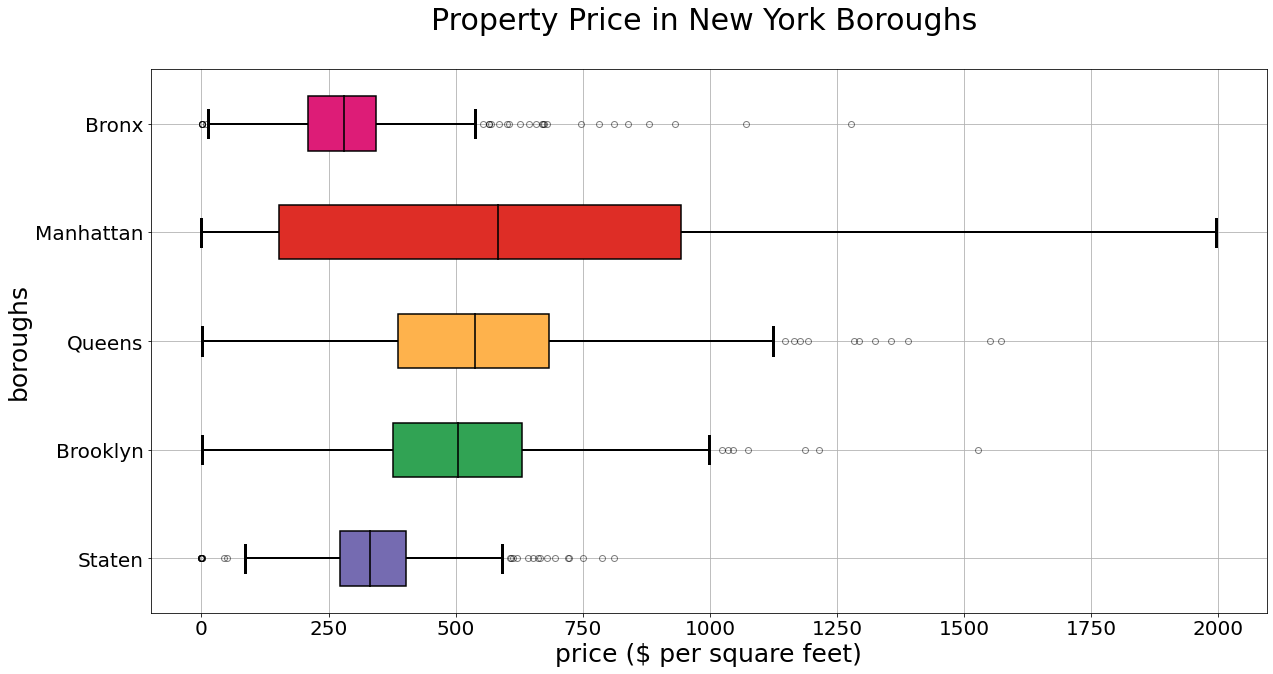

In [29]:
# boxplot showing the comparison of unit house price
Boroughprice = d[['Staten','Brooklyn','Queens','Manhattan','Bronx']]
fig,ax = plt.subplots(figsize=(20, 10))
f = Boroughprice.boxplot(patch_artist=True,return_type='dict',vert=False)
color = ['#756bb1','#31a354','#feb24c','#de2d26','#dd1c77'] 

for box,c in zip(f['boxes'], color):
    box.set( color='black', linewidth=1.5)
    box.set( facecolor = c )
ax.set_title('Property Price in New York Boroughs \n',fontsize=30)
plt.xticks(fontsize=20,color='#000000')
plt.yticks(fontsize=20,color='#000000')
plt.ylabel('boroughs', fontdict={'weight': 'normal', 'size': 25})
plt.xlabel('price ($ per square feet)', fontdict={'weight': 'normal', 'size': 25})

# detailed parameters setting
for whisker in f['whiskers']:
    whisker.set(color='black', linewidth=2)
for cap in f['caps']:
    cap.set(color='black', linewidth=3)
for median in f['medians']:
    median.set(color='black', linewidth=2,alpha=0.8)
for flier in f['fliers']:
    flier.set(marker='o', color='y', alpha=0.5)
plt.savefig('map/boxplot.pdf')
plt.show()

In [2]:
# relative location of boroughs in New York City
nybb=gpd.read_file('data/nybb_16a/nybb.shp')
gdf = gpd.GeoDataFrame(nybb)

In [3]:
gdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

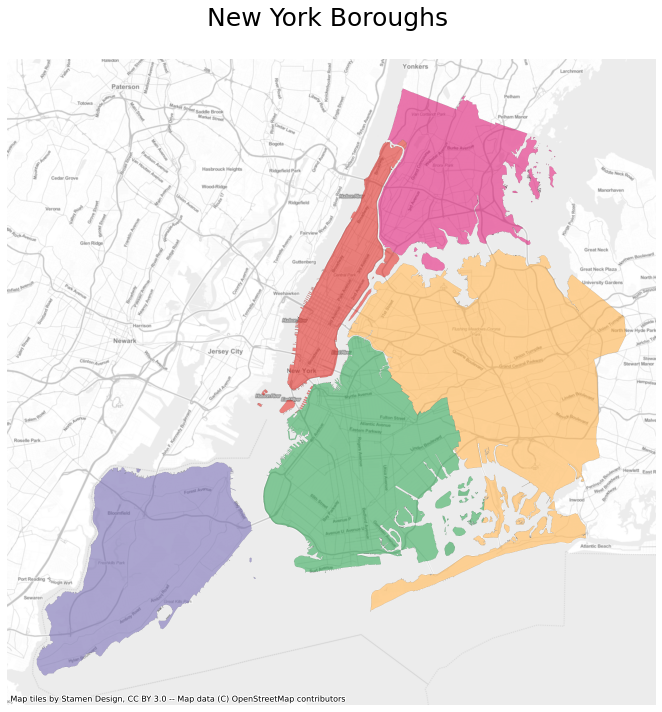

In [30]:
# contextily only use 3857 
gdf = gdf.to_crs(epsg=3857)
fig,ax=plt.subplots(figsize=(15, 10))
boundplot=gdf.plot(figsize=(8, 8), alpha=0.6, linewidth=0.1,
                   edgecolor='black',ax=ax,
                   column='BoroCode',
                   color = ['#756bb1','#feb24c','#31a354','#de2d26','#dd1c77'],
                   legend=True)
# add the basemap
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite,alpha=0.5)

# set the title
ax.set_title("New York Boroughs \n",fontsize= 25)
# remove the axis
ax.set_axis_off()
# tighten the layout
fig.tight_layout()

fig.savefig('map/New York Boroughs.pdf')

In [31]:
nybb

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

## 2.  Descrive and explore the dataset (EDA)

    * Describe and explore the dataset (EDA).
    * Add spatial component to the dataset by merging the Tax Lot dataset with x,y coordinates using the bb1_code column (borough, block, and lot column).
    * Visualize the dataset geographically.
    * Are there any spatial autocorrelation in the 'sale price' of the data?


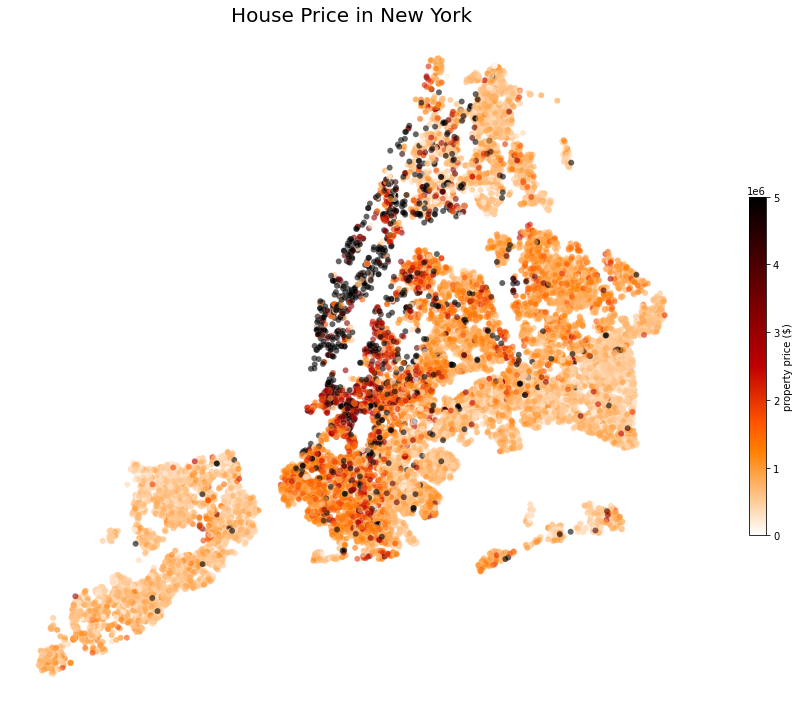

In [32]:
gdf = gpd.GeoDataFrame(df2000, geometry=gpd.points_from_xy(df2000.LONGITUDE, df2000.LATITUDE))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs("EPSG:32118")
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column=' SALE PRICE ', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price in New York",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

gdf[["geometry"]].to_file("data/ny/ny.shp")
fig.savefig('map/house price.pdf')

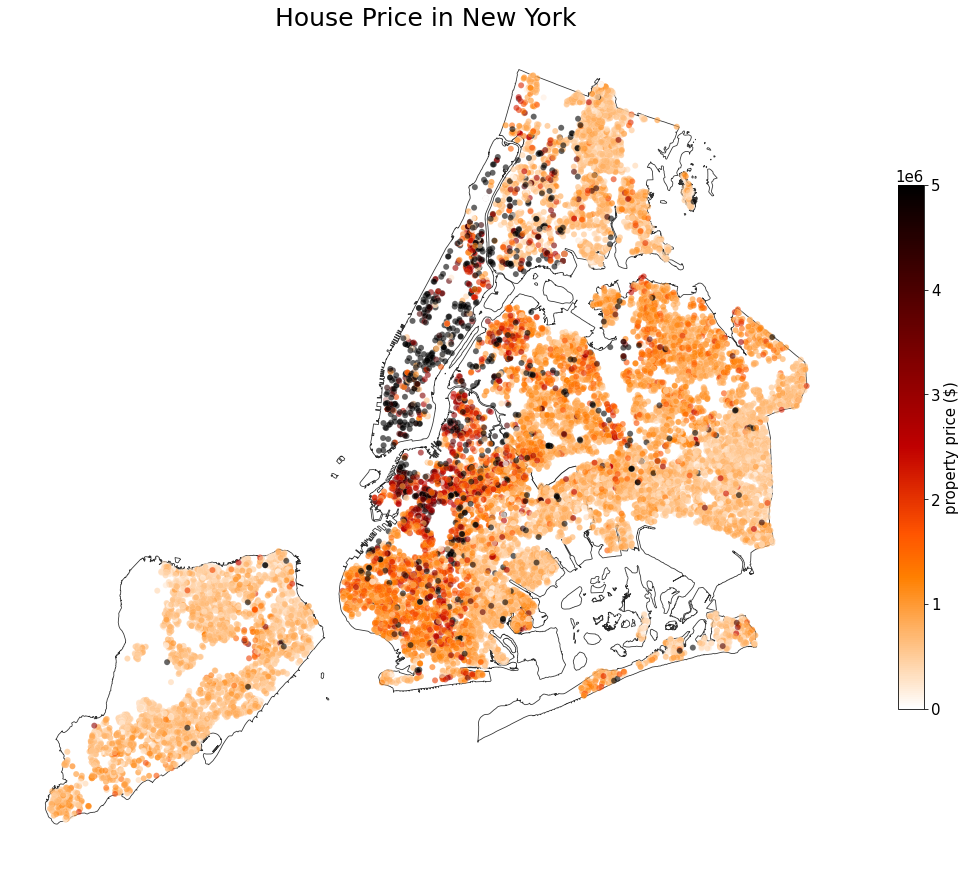

In [33]:
# add the borough boundary
gdfhouse =gdf.copy()

# Set up the matplotlib figure
matplotlib.rcParams['font.size'] = 15

# set an empty fig and axis 
fig,ax = plt.subplots(1,1,figsize=[15,15])

gdfnybb = gpd.GeoDataFrame(nybb)
gdfnybb = gdfnybb.to_crs("EPSG:32118")
boundplot=gdfnybb.plot(figsize=(10, 10), alpha=0.8, linewidth=0.8,
                   edgecolor='black',ax=ax,
                   color = 'white')
houseplot=gdfhouse.plot(figsize=(10, 10), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column=' SALE PRICE ', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price in New York",fontsize= 25)


ax.set_axis_off()
fig.tight_layout()
fig.savefig("map/house price.png", bbox_inches='tight', pad_inches=0, dpi=300)

In [34]:
gdf.head()

GROSS SQUARE FEET   SALE PRICE   BOROUGH   LATITUDE  LONGITUDE       price  \
0             1587.0      458000.0        2  40.854025 -73.896208  288.594833   
1             1495.0      475000.0        2  40.853938 -73.896263  317.725753   
2             1495.0      275000.0        2  40.853938 -73.896263  183.946488   
3             1260.0      110000.0        2  40.856048 -73.892731   87.301587   
4             1260.0      165000.0        2  40.856048 -73.892731  130.952381   

                       geometry  
0  POINT (308751.742 76333.961)  
1  POINT (308747.166 76324.206)  
2  POINT (308747.166 76324.206)  
3  POINT (309044.656 76558.903)  
4  POINT (309044.656 76558.903)

## 3. Build a simple linear predictive model for target price.

    * transforms the skewed data. 
    * train a linear regression model with relevant features where the target is predicted sales price.
    * apply kfold cross validation (k=3)
    * report MSE and adjR2 on each fold holdout testset and discuss the results. 
    * report the coefficients for the linear regression model.
    * visualise geographically observed sale price and final predicted sale price

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold # sampling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [36]:
# function to filter useful data
def borough123_dataset(data, n, feet):
    dfBorough=data[data['BOROUGH']==n]
    # clean a little bit
    dfBorough = dfBorough[dfBorough['RESIDENTIAL UNITS']>0]
    dfBorough['price'] = dfBorough[' SALE PRICE ']/dfBorough['GROSS SQUARE FEET']
    dfB = dfBorough[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS',' SALE PRICE ', 
                     'GROSS SQUARE FEET','LAND SQUARE FEET',
                     'YEAR BUILT','price','LATITUDE','LONGITUDE']]
    dfB = dfB.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    dfB = dfB[dfB['price']>50]
    dfB = dfB[dfB['price']<2000]
    dfB = dfB[dfB['GROSS SQUARE FEET']<feet]
    return dfB

In [37]:
# function to filter useful data
def borough45_dataset(data, n, feet):
    dfBorough=data[data['BOROUGH']==n]
    # clean a little bit
    dfBorough['price'] = dfBorough[' SALE PRICE ']/dfBorough['GROSS SQUARE FEET']
    dfB = dfBorough[[' SALE PRICE ', 'COMMERCIAL UNITS',
                     'GROSS SQUARE FEET','LAND SQUARE FEET',
                     'YEAR BUILT','price','LATITUDE','LONGITUDE']]
    dfB = dfB.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
    dfB = dfB[dfB['price']>50]
    dfB = dfB[dfB['price']<2000]
    dfB = dfB[dfB['GROSS SQUARE FEET']<feet]
    return dfB

In [38]:
dfmanhattan = borough123_dataset(A, 1, 100000)
dfbronx = borough123_dataset(A, 2, 100000)
dfbrooklyn = borough123_dataset(A, 3, 100000)
dfqueens = borough45_dataset(A, 4, 100000)
dfstaten = borough45_dataset(A, 5, 100000)

In [39]:
# function for checking linear relationship, in order to select variables
def scatter(dfborough, column1,column2,column3):
    fig, ax = plt.subplots(3, 2,figsize=(8,8))  
    ax[0][0].set_title(column1)
    ax[0][0].scatter(dfborough[column1],dfborough[' SALE PRICE '],c='skyblue',marker='o')
    ax[0][1].set_title(column2)
    ax[0][1].scatter(dfborough[column2],dfborough[' SALE PRICE '],c='skyblue',marker='o')

    ax[1][0].set_title('GROSS SQUARE FEET')
    ax[1][0].scatter(dfborough['GROSS SQUARE FEET'],dfborough[' SALE PRICE '],c='skyblue',marker='o')
    ax[1][1].set_title('LAND SQUARE FEET')
    ax[1][1].scatter(dfborough['LAND SQUARE FEET'],dfborough[' SALE PRICE '],c='skyblue',marker='o')

    ax[2][0].set_title('LATITUDE')
    ax[2][0].scatter(dfborough['LATITUDE'],dfborough[' SALE PRICE '],c='skyblue',marker='o')
    ax[2][1].set_title(column3)
    ax[2][1].scatter(dfborough[column3],dfborough[' SALE PRICE '],c='skyblue',marker='o')

    fig.tight_layout(pad=2.0)
    return fig

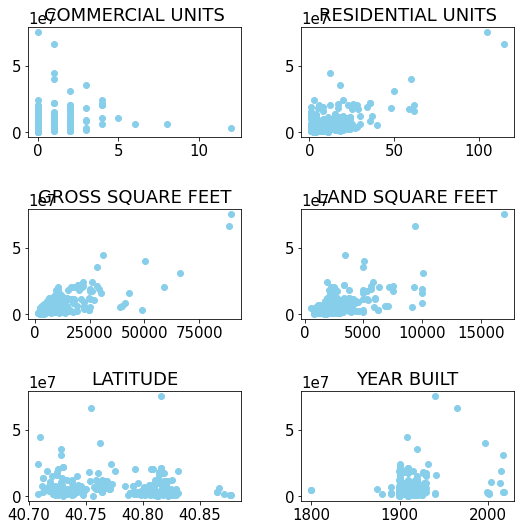

In [40]:
# find linear relationships
figmanhattan = scatter(dfmanhattan,'COMMERCIAL UNITS','RESIDENTIAL UNITS','YEAR BUILT')

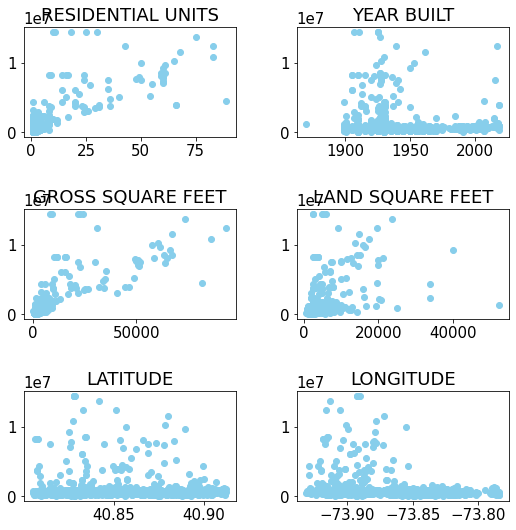

In [41]:
figbronx = scatter(dfbronx,'RESIDENTIAL UNITS','YEAR BUILT','LONGITUDE')

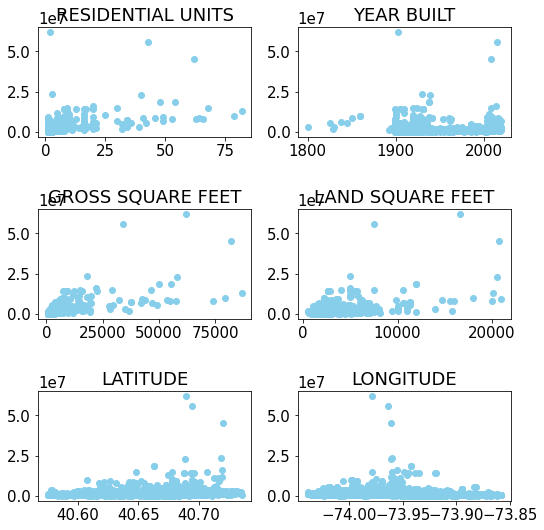

In [42]:
figbrooklyn = scatter(dfbrooklyn,'RESIDENTIAL UNITS','YEAR BUILT','LONGITUDE')

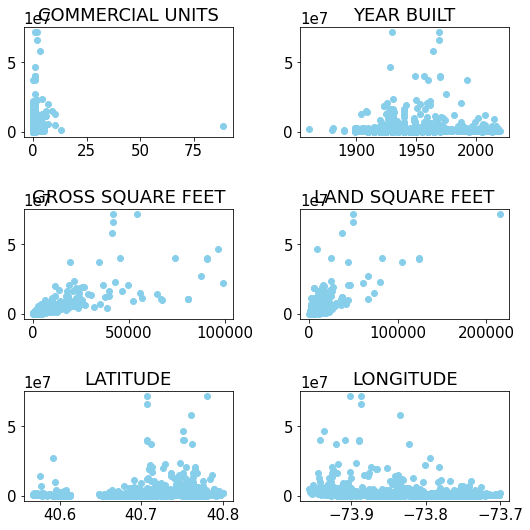

In [43]:
figqueens = scatter(dfqueens,'COMMERCIAL UNITS','YEAR BUILT','LONGITUDE')

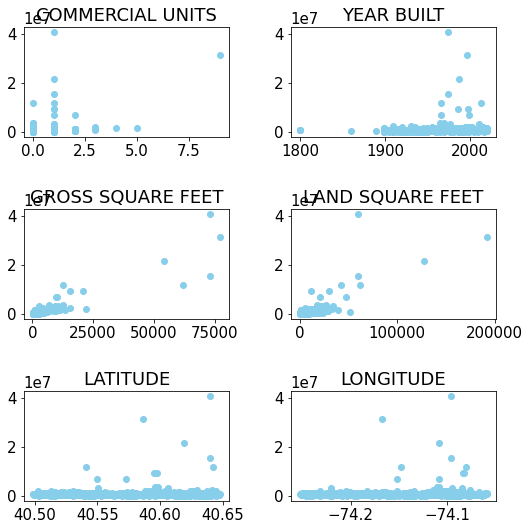

In [44]:
figstaten = scatter(dfstaten,'COMMERCIAL UNITS','YEAR BUILT','LONGITUDE')

In [45]:
# function to get scaled X
def skewed_X(dfborough, variables):
    X = dfborough[variables]
    y = dfborough[[' SALE PRICE ']]
    
    numeric_data=X.select_dtypes(include=[np.number])
    skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
    
    skewed = skewed[(skewed > 0.75)]
    skewed = skewed.index
    X[skewed] = np.log1p(X[skewed])
    return X

In [46]:
# function to check normalization

def skewed_hist(dfborough,variables):
    X = skewed_X(dfborough,variables)
    y = dfborough[[' SALE PRICE ']]
    print (X.shape)
    print (y.shape)
    hist = X.hist(bins=20,figsize=(15,2), color='lightblue',
                  xlabelsize=0,ylabelsize=0,grid=False, 
                  layout=(1,6))
    return hist

(2347, 6)
(2347, 1)


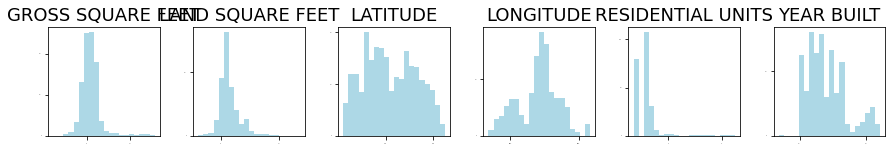

In [47]:
hist_bronx = skewed_hist(dfbronx, ['RESIDENTIAL UNITS',
                                   'GROSS SQUARE FEET','LAND SQUARE FEET',
                                   'YEAR BUILT','LATITUDE','LONGITUDE'])

(299, 6)
(299, 1)


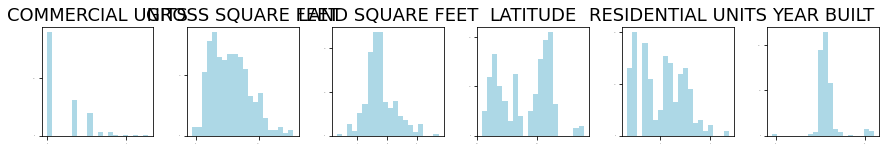

In [48]:
hist_manhattan = skewed_hist(dfmanhattan, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                           'YEAR BUILT','LATITUDE',
                                           'COMMERCIAL UNITS','RESIDENTIAL UNITS'])

(7604, 6)
(7604, 1)


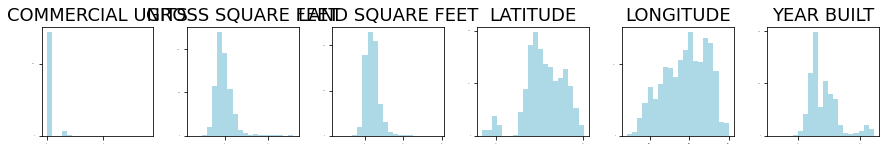

In [49]:
hist_queens = skewed_hist(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                     'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'])

(5162, 6)
(5162, 1)


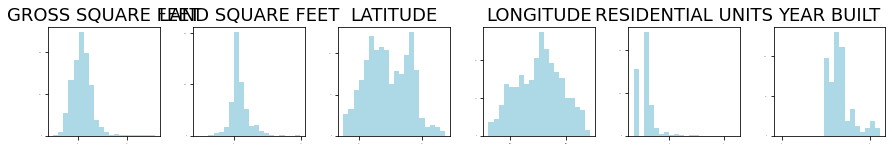

In [50]:
hist_brooklyn = skewed_hist(dfbrooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                         'YEAR BUILT','LATITUDE','LONGITUDE',
                                         'RESIDENTIAL UNITS'])

(3591, 5)
(3591, 1)


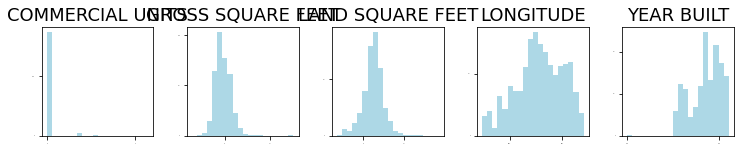

In [51]:
hist_staten = skewed_hist(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                     'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'])

In [52]:
# function of correlation matrix to understand the association between variables
def correlation(dfborough, variables):
    X = skewed_X(dfborough,variables)
    corr = X.corr()
    f, ax = plt.subplots(figsize=(10, 10))
    heatmap = sns.heatmap(corr, center=0,cmap=plt.get_cmap('viridis'),
                          square=True, linewidths=.05, annot=True, vmin=-1, vmax=1,ax=ax) 
    return heatmap

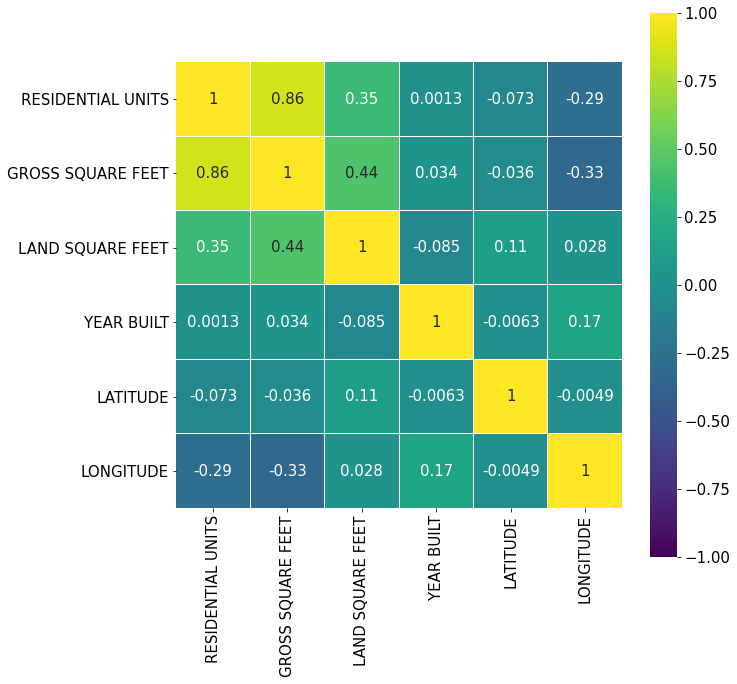

In [53]:
heatmapb = correlation(dfbronx, ['RESIDENTIAL UNITS',
                                 'GROSS SQUARE FEET','LAND SQUARE FEET',
                                 'YEAR BUILT','LATITUDE','LONGITUDE'])

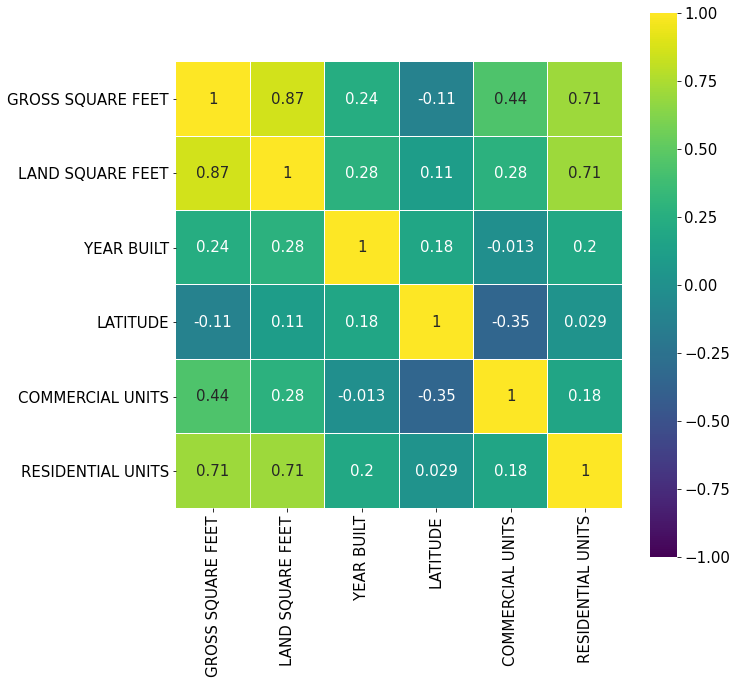

In [54]:
heatmapm = correlation(dfmanhattan, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                     'YEAR BUILT','LATITUDE',
                                     'COMMERCIAL UNITS','RESIDENTIAL UNITS'])

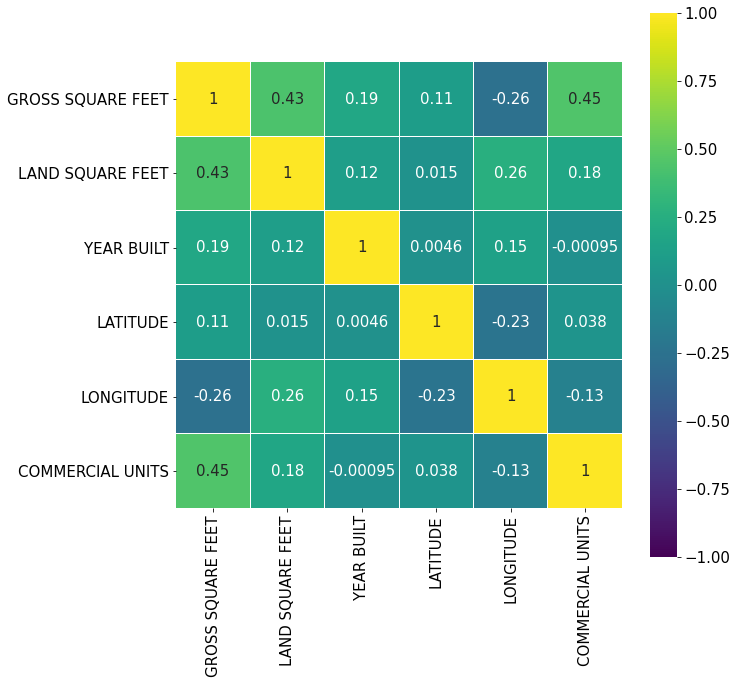

In [55]:
heatmapq = correlation(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                  'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'])

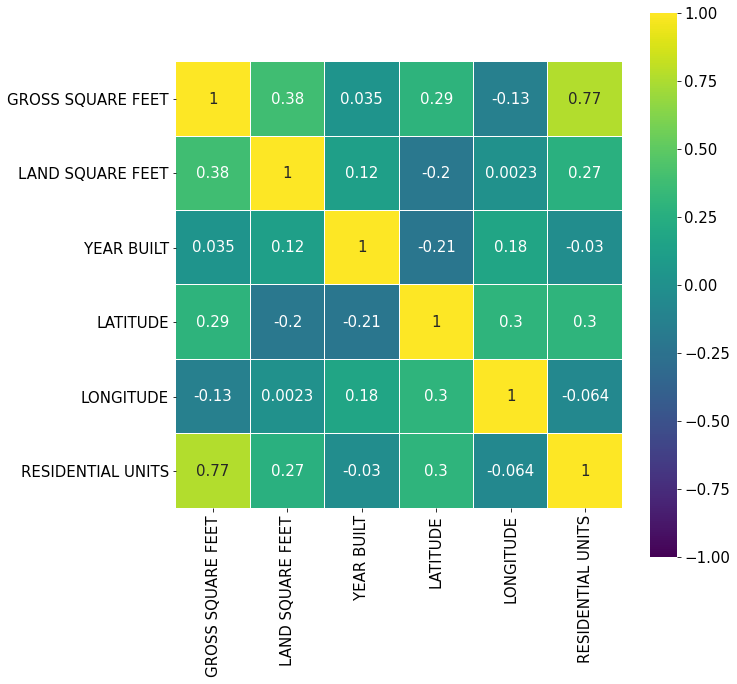

In [56]:
heatmapbl = correlation(dfbrooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                     'YEAR BUILT','LATITUDE','LONGITUDE',
                                     'RESIDENTIAL UNITS'])

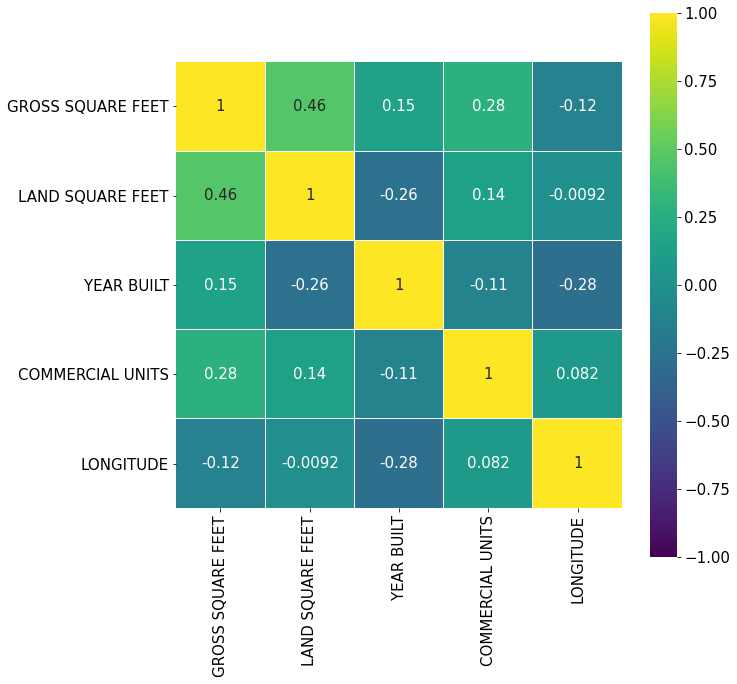

In [57]:
heatmaps = correlation(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                  'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'])

In [58]:
# function to check accuracy
def prediction(dfborough, variables):
    X = skewed_X(dfborough,variables)
    y = dfborough[[' SALE PRICE ']]
    
    scaler = StandardScaler()
    scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    ### split the dataset by 70%
    (X_train, X_test, y_train, y_test) = train_test_split(scaled_X, y, 
                                                          train_size=0.7,
                                                          random_state=1)
    # define Linear Regression model (OLS)
    model1=LinearRegression()
    # fit model on training data
    model1.fit(X_train,y_train)
    # report accuracy score for logistic regression model
    y_pred=model1.predict(X_test)
    print ('RMSE(OLS): ',mean_squared_error(y_test,y_pred,squared=False))
    print ('R2(OLS): ', r2_score(y_test,y_pred))
      
    model2 = linear_model.Lasso(alpha=0.1)
    tuned_parameters = [{'alpha': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]}]
    LASSO_GridSearch = GridSearchCV(model2, tuned_parameters, cv=2, scoring='r2')
    LASSO_GridSearch.fit(X_train, y_train)
    print ("Best Score: {}".format(LASSO_GridSearch.best_score_))
    print ("Best params: {}".format(LASSO_GridSearch.best_params_))
    
    model2 = linear_model.Lasso(alpha=LASSO_GridSearch.best_params_['alpha'])
    model2.fit(X_train,y_train)
    y_pred=model2.predict(X_test)
    print ('RMSE(Lasso): ',mean_squared_error(y_test,y_pred,squared=False))
    print ('R2(Lasso): ', r2_score(y_test,y_pred))
    
    # automatically reduce importance of certain variables
    coef = pd.DataFrame(model2.coef_, index = X.columns)
    coef = coef.reset_index()
    coef.columns=['features','importance']
    coef['importance']=np.abs(coef['importance'])
    coef=coef.sort_values(by='importance',ascending=False)
    plt.figure(figsize=(6,6))

    barplot = sns.barplot(x='importance',y='features',data=coef,)
    return y_pred

In [59]:
# function to get y_test, in order to merge with y_pred data
def y_test(dfborough, variables):
    X = skewed_X(dfborough,variables)
    y = dfborough[[' SALE PRICE ']]
    
    scaler = StandardScaler()
    scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    ### split the dataset by 70%
    (X_train, X_test, y_train, y_test) = train_test_split(scaled_X, y, 
                                                          train_size=0.7,
                                                          random_state=1)
    return y_test

In [60]:
# function to use k-fold to check model fit
def kfold(dfborough, variables):
    X = skewed_X(dfborough,variables)
    y = dfborough[[' SALE PRICE ']]
    
    scaler = StandardScaler()
    scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
    
    model2 = linear_model.Lasso(alpha=0.1)
    tuned_parameters = [{'alpha': [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]}]
    LASSO_GridSearch = GridSearchCV(model2, tuned_parameters, cv=2, scoring='r2')
    
    k = KFold(n_splits=3, shuffle=True, random_state=0)
    i = 1
    for train_index, test_index in k.split(scaled_X):
        X_train, X_test = scaled_X.iloc[train_index,:], scaled_X.iloc[test_index,:]
        y_train, y_test = y.iloc[train_index,:], y.iloc[test_index,:]
        LASSO_GridSearch.fit(X_train, y_train)
        model2 = linear_model.Lasso(alpha=LASSO_GridSearch.best_params_['alpha'])
        model2.fit(X_train,y_train)
        print(f"RMSE(Lasso) for fold {i}:{mean_squared_error(y_test,model2.predict(X_test),squared=False)}")
        print(f"R2(Lasso) for fold {i}:{r2_score(y_test,model2.predict(X_test))}")
        i=i+1
    return kfold

In [61]:
# import rpy2
import rpy2
from rpy2 import robjects as ro
from rpy2.robjects import pandas2ri, globalenv
from rpy2.robjects.packages import importr

# load baseR and various packages
base = importr('base')
utils = importr('utils')
stats = importr('stats')

print(base.R_home())

[1] "/Library/Frameworks/R.framework/Resources"



RMSE(OLS):  944625.0061902658
R2(OLS):  0.5672968859313516
Best Score: 0.6041097554854202
Best params: {'alpha': 0.1}
RMSE(Lasso):  944625.0244271344
R2(Lasso):  0.5672968692238753
RMSE(Lasso) for fold 1:821755.4098168864
R2(Lasso) for fold 1:0.5853071689698589
RMSE(Lasso) for fold 2:855102.9854624606
R2(Lasso) for fold 2:0.5636035470151488
RMSE(Lasso) for fold 3:665789.8932582114
R2(Lasso) for fold 3:0.6309862191699138


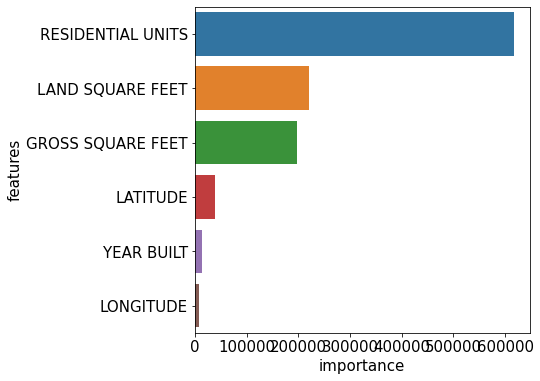

In [62]:
pred_bronx = prediction(dfbronx, ['RESIDENTIAL UNITS',
                                  'GROSS SQUARE FEET','LAND SQUARE FEET',
                                  'YEAR BUILT','LATITUDE','LONGITUDE'])
test_bronx = y_test(dfbronx, ['RESIDENTIAL UNITS',
                              'GROSS SQUARE FEET','LAND SQUARE FEET',
                              'YEAR BUILT','LATITUDE','LONGITUDE'])
kfold_bronx = kfold(dfbronx, ['RESIDENTIAL UNITS',
                              'GROSS SQUARE FEET','LAND SQUARE FEET',
                              'YEAR BUILT','LATITUDE','LONGITUDE'])

In [63]:
scaler = StandardScaler()
X = skewed_X(dfbronx, ['RESIDENTIAL UNITS',
                     'GROSS SQUARE FEET','LAND SQUARE FEET',
                     'YEAR BUILT','LATITUDE','LONGITUDE'])
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y = dfbronx[[' SALE PRICE ']]
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df = pd.concat([X,y],axis=1)
df.columns = ['residential_units', 'gross_square_feet', 
              'land_square_feet', 'year_built','latitude','longitude','sale_price']
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["df"] = df

In [64]:
# runs lm() model from rpy2 
R = ro.r

rcode = """
fit1 <- lm('sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude', data=df)
print (summary(fit1))
"""
R(rcode)


Call:
lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude", 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4221 -0.2771 -0.0376  0.2644  9.3044 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.792e-14  1.317e-02   0.000  1.00000    
residential_units  5.111e-01  2.604e-02  19.632  < 2e-16 ***
gross_square_feet  1.971e-01  2.796e-02   7.051 2.33e-12 ***
land_square_feet   1.625e-01  1.535e-02  10.587  < 2e-16 ***
year_built        -2.190e-02  1.361e-02  -1.609  0.10782    
latitude          -3.908e-02  1.336e-02  -2.925  0.00348 ** 
longitude         -7.315e-03  1.461e-02  -0.501  0.61665    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6381 on 2340 degrees of freedom
Multiple R-squared:  0.5941,	Adjusted R-squared:  0.593 
F-statistic: 570.8 on 6 and 2340 DF,  p-value: < 2.2e-16



<rpy2.robjects.vectors.ListVector object at 0x7fbce1cab700> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fbcca5b8380> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([ 0.37363913,  0.4017942 ,  0.23862112, ..., -0.30336683,
       -0.97576188, -0.58404323])
  coefficients: <class 'numpy.ndarray'>
  array([[-1.79190667e-14,  1.31708531e-02, -1.36050919e-12,
         1.00000000e+00],
       [ 5.11133049e-01,  2.60363711e-02,  1.96315011e+01,
         1.48205151e-79],
       [ 1.97126673e-01,  2.79580427e-02,  7.05080378e+00,
         2.33208570e-12],
       [ 1.62503501e-01,  1.53491478e-02,  1.05871351e+01,
         1.28521877e-25],
       [-2.18977917e-02,  1.36122081e-02, -1.60868770e+00,
         1.07819544e-01],
       [-3.90780832e-02,  1.33613670e-02, -2.92470697e+00,
         3.48096117e-03],
       [-7.31548662e-03,  1.46111719e-02, -5.00677609e-01,
         6.16645121e-01]])
...
  sigma: <class 'numpy.ndarray'>
  array([0.59407699])
  df: <class 'numpy.ndarray'>
  array([0.59303616])
  r.squared: <class 'numpy.ndarray'>
  array([ 570.77333259,    6.        , 2340.        ])
  adj.r.squared: <class 'numpy.ndarray'>
  array([[ 4.26075841e-04,  2.02305949e-17,  1.20585751e-16,
        -8.97059435e-17, -4.82683280e-17,  1.58397197e-16,
         2.79746621e-16],
       [ 2.02305949e-17,  1.66502212e-03, -1.45952333e-03,
         5.43644866e-05,  5.39126172e-05,  6.34014707e-05,
        -9.26517586e-06],
       [ 1.20585751e-16, -1.45952333e-03,  1.91987356e-03,
        -3.49112618e-04, -1.33105924e-04,  7.50679741e-07,
         2.41803297e-04],
       [-8.97059435e-17,  5.43644866e-05, -3.49112618e-04,
         5.78665560e-04,  8.18626020e-05, -7.11902121e-05,
        -1.29187782e-04],
       [-4.82683280e-17,  5.39126172e-05, -1.33105924e-04,
         8.18626020e-05,  4.55109876e-04, -7.34968817e-06,
        -1.06291863e-04],
       [ 1.58397197e-16,  6.34014707e-05,  7.50679741e-07,
        -7.11902121e-05, -7.34968817e-06,  4.38491205e-04,
         2.39127145e-05],
       [ 2.79746621e-16, -9.26517586e-06,  2.41803297e-04,
        -1.29187782e-04, -1.06291863e-04,  2.39127145e-05,
         5.24359575e-04]])

RMSE(OLS):  4667369.38128919
R2(OLS):  0.39578833531145063
Best Score: 0.3150387927613475
Best params: {'alpha': 0.1}
RMSE(Lasso):  4667369.364457326
R2(Lasso):  0.39578833966936944
RMSE(Lasso) for fold 1:6512248.121985453
R2(Lasso) for fold 1:0.3324451939335138
RMSE(Lasso) for fold 2:5758451.396663301
R2(Lasso) for fold 2:0.24730478348130724
RMSE(Lasso) for fold 3:7261334.650802237
R2(Lasso) for fold 3:0.44186756031936536


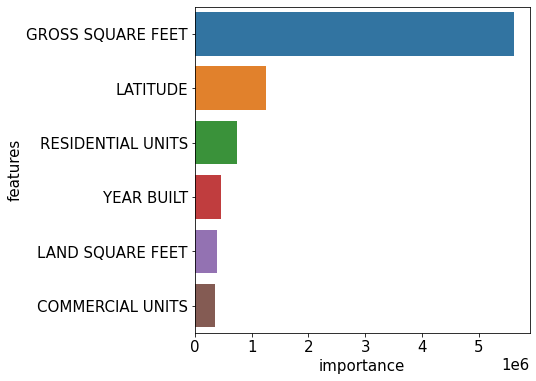

In [65]:
pred_manhattan = prediction(dfmanhattan, ['RESIDENTIAL UNITS','COMMERCIAL UNITS',
                                          'GROSS SQUARE FEET','LAND SQUARE FEET',
                                          'YEAR BUILT','LATITUDE'])
test_manhattan = y_test(dfmanhattan, ['RESIDENTIAL UNITS','COMMERCIAL UNITS',
                                      'GROSS SQUARE FEET','LAND SQUARE FEET',
                                      'YEAR BUILT','LATITUDE'])
kfold_manhattan = kfold(dfmanhattan, ['RESIDENTIAL UNITS','COMMERCIAL UNITS',
                                      'GROSS SQUARE FEET','LAND SQUARE FEET',
                                      'YEAR BUILT','LATITUDE'])

In [66]:
scaler = StandardScaler()
X=skewed_X(dfmanhattan, ['RESIDENTIAL UNITS','COMMERCIAL UNITS',
                         'GROSS SQUARE FEET','LAND SQUARE FEET',
                         'YEAR BUILT','LATITUDE'])
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfmanhattan[[' SALE PRICE ']]
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df=pd.concat([X,y],axis=1)
df.columns = ['residential_units', 'commercial_units','gross_square_feet', 
              'land_square_feet', 'year_built','latitude','sale_price']
df = df.replace(np.nan, 0, regex=True)
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["df"] = df

In [67]:
# runs lm() model from rpy2
R = ro.r

rcode = """
fit2 <- lm('sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+commercial_units', data=df)
print (summary(fit2))
"""
R(rcode)


Call:
lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+commercial_units", 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8797 -0.3835  0.0285  0.2882  6.2239 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.335e-14  4.403e-02   0.000  1.00000    
residential_units -3.871e-02  6.569e-02  -0.589  0.55608    
gross_square_feet  6.546e-01  1.068e-01   6.131 2.83e-09 ***
land_square_feet   2.739e-02  9.995e-02   0.274  0.78426    
year_built         6.332e-02  4.662e-02   1.358  0.17551    
latitude          -1.481e-01  5.114e-02  -2.897  0.00406 ** 
commercial_units  -9.211e-02  5.306e-02  -1.736  0.08364 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7613 on 292 degrees of freedom
Multiple R-squared:  0.434,	Adjusted R-squared:  0.4224 
F-statistic: 37.31 on 6 and 292 DF,  p-value: < 2.2e-16



<rpy2.robjects.vectors.ListVector object at 0x7fbccb127580> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+commercial_units",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fbccb127cc0> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([ 1.69718224e-01, -5.25385222e-01,  7.68276567e-02, -1.43505072e+00,
       -6.09298645e-01, -6.01372556e-01, -1.16240658e+00, -5.46706171e-01,
       -1.14202872e+00,  7.85258523e-01, -7.55956917e-01,  3.23184084e-01,
        3.39923890e-01,  1.39078604e-01,  4.43601794e-01, -1.13779955e-01,
        3.63477892e-02,  1.40619773e-03, -1.37335220e-01,  2.71724331e-01,
       -9.08002352e-01, -1.22144390e+00,  2.97921200e-01,  2.48552770e-01,
       -8.36860288e-01,  5.88972576e-01,  3.77236784e-01, -3.17086269e-01,
        3.03151489e-01,  1.07963320e-02,  3.81080540e-01, -1.10872499e-01,
       -3.01849433e-01, -4.82763863e-01, -3.19965566e-01,  1.12691195e-01,
        1.12691195e-01,  5.11442523e-01,  5.38266604e-03,  2.89550967e-01,
       -5.09556646e-01, -4.86466015e-01, -2.10211328e-01,  1.04936085e-01,
       -4.19895047e-01, -2.63965942e-01,  1.03309477e+00, -1.04850371e-01,
        4.61620929e-01,  1.26636016e+00,  2.85091611e-02, -1.30987238e+00,
        2.29165507e-03,  3.99348625e-01, -4.43168359e-01, -9.66727891e-01,
       -5.29880946e-01, -3.83455197e-01, -1.87972706e+00, -8.29541114e-01,
        2.93552975e-01,  9.89222162e-01,  9.88919815e-01,  4.21007687e-01,
        2.33064271e+00,  2.13321605e-01,  1.62217225e-01,  1.44866733e-01,
        4.02362580e-01,  4.43303306e-01,  5.27633099e-01,  5.97989487e-01,
       -4.83916756e-01, -3.41600421e-01,  1.25597096e-01,  3.43362170e-01,
       -2.61253352e-01,  5.62350893e-01,  3.32367071e-01,  1.24392848e-01,
        3.62805712e-02,  1.26822676e-01,  5.66517679e-01,  1.43427403e-01,
        2.41883778e-01,  3.30399231e-02, -2.98631488e-02, -3.69523915e-01,
       -1.09126187e-01, -2.62712546e-01,  6.30639060e-02,  6.71339878e-02,
        1.91370652e-01,  1.16034243e-01,  1.91427685e-01, -1.02747555e-01,
        4.02496578e-01,  2.50883634e-01,  3.40480523e-01,  2.45853412e-01,
        5.24099546e-02, -2.04855226e-01, -2.30787904e-02, -2.30711496e-01,
       -5.12900988e-01, -4.43029780e-01, -3.16968389e-01, -3.55567899e-01,
       -8.00138635e-02,  2.17543363e-01, -6.19671325e-02,  4.08375047e-01,
        1.58273752e-01,  1.38373354e+00,  1.10749984e+00,  3.28461244e-01,
        2.49481633e-01,  7.27334980e-02,  1.93093068e-01,  3.18519270e-02,
       -1.34861585e-02, -1.06638896e+00, -1.75361031e-01, -1.71089987e-01,
       -3.59535257e-01,  2.80685754e-01,  1.48744252e-02,  1.02327477e+00,
       -2.87720341e-01, -3.00493792e-01,  3.35591327e-01,  4.34255429e-01,
        1.79718017e-01,  1.81518164e-01, -4.60408327e-01, -6.65031571e-01,
       -8.30958937e-01,  1.01162607e+00,  3.15131810e-01,  3.55911221e-01,
        1.86687314e-01,  3.37942555e-01,  2.87666013e-01, -1.98548866e-01,
        3.97974358e-01,  4.10689968e-01,  3.04148045e-01,  9.68147393e-01,
        1.17228627e+00, -2.29745733e-01,  1.08053774e+00,  2.65010492e-01,
       -3.63903695e-02,  4.09884513e-02, -5.34420595e-02, -1.32827273e+00,
        1.59844468e-01, -1.33507192e-01, -8.51056250e-01, -8.47711824e-01,
        1.77650488e-01, -9.63047869e-01, -6.78885174e-01, -4.72845971e-01,
        2.88782287e-01, -5.37113494e-01, -5.36897813e-01, -5.36672491e-01,
       -9.01007632e-01, -1.56585077e+00,  6.22388140e+00, -4.29095759e-01,
       -2.65044352e-01,  7.38297466e-02,  4.31421815e-01,  4.64038408e-03,
        3.89646034e-01,  4.93023153e-01, -3.83455429e-01,  8.33554396e-02,
       -3.79431640e-02,  2.94261264e-02, -6

RMSE(OLS):  1054811.2994221337
R2(OLS):  0.354998644890573
Best Score: 0.3315803332863669
Best params: {'alpha': 0.1}
RMSE(Lasso):  1054811.258250659
R2(Lasso):  0.3549986952420554
RMSE(Lasso) for fold 1:1209855.9494249688
R2(Lasso) for fold 1:0.3167449316799409
RMSE(Lasso) for fold 2:1534489.81105107
R2(Lasso) for fold 2:0.2786764605874935
RMSE(Lasso) for fold 3:1824778.2858048833
R2(Lasso) for fold 3:0.3272277454773995


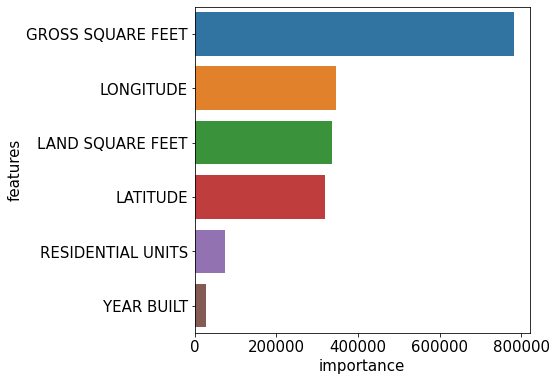

In [68]:
pred_brooklyn = prediction(dfbrooklyn, ['RESIDENTIAL UNITS',
                                        'GROSS SQUARE FEET','LAND SQUARE FEET',
                                        'YEAR BUILT','LATITUDE','LONGITUDE'])
test_brooklyn = y_test(dfbrooklyn, ['RESIDENTIAL UNITS',
                                    'GROSS SQUARE FEET','LAND SQUARE FEET',
                                    'YEAR BUILT','LATITUDE','LONGITUDE'])
kfold_brooklyn = kfold(dfbrooklyn, ['RESIDENTIAL UNITS',
                                    'GROSS SQUARE FEET','LAND SQUARE FEET',
                                    'YEAR BUILT','LATITUDE','LONGITUDE'])

In [69]:
scaler = StandardScaler()
X=skewed_X(dfbrooklyn, ['RESIDENTIAL UNITS',
                        'GROSS SQUARE FEET','LAND SQUARE FEET',
                        'YEAR BUILT','LATITUDE','LONGITUDE'])
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfbrooklyn[[' SALE PRICE ']]
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df=pd.concat([X,y],axis=1)
df.columns = ['residential_units', 'gross_square_feet', 
              'land_square_feet', 'year_built','latitude','longitude','sale_price']
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["df"] = df

In [70]:
# runs lm() model from rpy2
R = ro.r

rcode = """
fit3 <- lm('sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude', data=df)
print (summary(fit3))
"""
R(rcode)


Call:
lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude", 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8389 -0.2933 -0.0354  0.2145 29.0101 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -2.802e-14  1.136e-02   0.000  1.00000    
residential_units  5.283e-02  1.786e-02   2.958  0.00311 ** 
gross_square_feet  3.681e-01  1.967e-02  18.711  < 2e-16 ***
land_square_feet   1.580e-01  1.343e-02  11.770  < 2e-16 ***
year_built         1.317e-02  1.226e-02   1.074  0.28270    
latitude           1.705e-01  1.463e-02  11.656  < 2e-16 ***
longitude         -1.819e-01  1.316e-02 -13.822  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8159 on 5155 degrees of freedom
Multiple R-squared:  0.3352,	Adjusted R-squared:  0.3345 
F-statistic: 433.3 on 6 and 5155 DF,  p-value: < 2.2e-16



<rpy2.robjects.vectors.ListVector object at 0x7fbccb123240> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = "sale_price~residential_units+gross_square_feet+land_square_feet+year_built+latitude+longitude",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fbcca61a440> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([-0.43905004, -0.03987376,  0.18184192, ..., -0.85617049,
       -0.70886228, -0.27988112])
  coefficients: <class 'numpy.ndarray'>
  array([[-2.80198171e-14,  1.13558219e-02, -2.46744070e-12,
         1.00000000e+00],
       [ 5.28306039e-02,  1.78622795e-02,  2.95766304e+00,
         3.11388319e-03],
       [ 3.68134965e-01,  1.96749813e-02,  1.87108166e+01,
         1.23313509e-75],
       [ 1.58020439e-01,  1.34256460e-02,  1.17700437e+01,
         1.40822491e-31],
       [ 1.31736341e-02,  1.22616725e-02,  1.07437498e+00,
         2.82704938e-01],
       [ 1.70509010e-01,  1.46287937e-02,  1.16557123e+01,
         5.23902167e-31],
       [-1.81853114e-01,  1.31569525e-02, -1.38218265e+01,
         1.07844478e-42]])
...
  sigma: <class 'numpy.ndarray'>
  array([0.33523857])
  df: <class 'numpy.ndarray'>
  array([0.33446484])
  r.squared: <class 'numpy.ndarray'>
  array([ 433.27694341,    6.        , 5155.        ])
  adj.r.squared: <class 'numpy.ndarray'>
  array([[ 1.93723363e-04,  4.69782878e-18,  2.46565401e-17,
        -1.99557953e-17, -2.27297865e-17, -5.80640876e-17,
         2.19728685e-17],
       [ 4.69782878e-18,  4.79312344e-04, -3.61037390e-04,
        -2.08904275e-07,  2.30482732e-05, -2.97964396e-05,
        -1.24565130e-05],
       [ 2.46565401e-17, -3.61037390e-04,  5.81531854e-04,
        -1.44406649e-04, -6.13436136e-05, -1.34911054e-04,
         1.06528598e-04],
       [-1.99557953e-17, -2.08904275e-07, -1.44406649e-04,
         2.70779159e-04,  6.32639790e-06,  1.13376456e-04,
        -5.53685714e-05],
       [-2.27297865e-17,  2.30482732e-05, -6.13436136e-05,
         6.32639790e-06,  2.25862575e-04,  8.16862722e-05,
        -7.17434263e-05],
       [-5.80640876e-17, -2.97964396e-05, -1.34911054e-04,
         1.13376456e-04,  8.16862722e-05,  3.21485865e-04,
        -1.32073115e-04],
       [ 2.19728685e-17, -1.24565130e-05,  1.06528598e-04,
        -5.53685714e-05, -7.17434263e-05, -1.32073115e-04,
         2.60049166e-04]])

RMSE(OLS):  2033289.4761682046
R2(OLS):  0.3720704453779837
Best Score: 0.3211323386536067
Best params: {'alpha': 0.1}
RMSE(Lasso):  2033289.4988767665
R2(Lasso):  0.3720704313520641
RMSE(Lasso) for fold 1:1755538.0492368597
R2(Lasso) for fold 1:0.3448067536483802
RMSE(Lasso) for fold 2:2030242.5831452594
R2(Lasso) for fold 2:0.3517054463208962
RMSE(Lasso) for fold 3:1765976.1156488482
R2(Lasso) for fold 3:0.3858329209156798


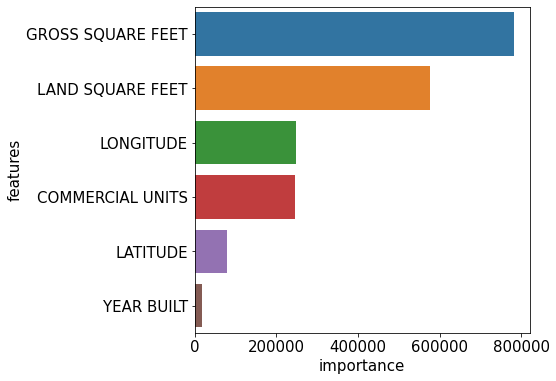

In [71]:
pred_queens = prediction(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                    'YEAR BUILT','LATITUDE','LONGITUDE'])
test_queens = y_test(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                'YEAR BUILT','LATITUDE','LONGITUDE'])
kfold_queens = kfold(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                'YEAR BUILT','LATITUDE','LONGITUDE'])

In [72]:
scaler = StandardScaler()
X=skewed_X(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                      'YEAR BUILT','LATITUDE','LONGITUDE'])
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfqueens[[' SALE PRICE ']]
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df=pd.concat([X,y],axis=1)
df.columns = ['gross_square_feet','land_square_feet','commercial_units',
              'year_built','latitude','longitude','sale_price']
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["df"] = df

In [73]:
# runs lm() model from rpy2
R = ro.r

rcode = """
fit4 <- lm('sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+latitude+longitude', data=df)
print (summary(fit4))
"""
R(rcode)


Call:
lm(formula = "sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+latitude+longitude", 
    data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9376 -0.2290 -0.0014  0.1956 26.0948 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -5.814e-15  9.154e-03   0.000 1.000000    
commercial_units   1.048e-01  1.028e-02  10.193  < 2e-16 ***
gross_square_feet  3.443e-01  1.255e-02  27.444  < 2e-16 ***
land_square_feet   2.837e-01  1.129e-02  25.139  < 2e-16 ***
year_built        -1.265e-02  9.607e-03  -1.317 0.187904    
latitude           3.476e-02  9.438e-03   3.684 0.000232 ***
longitude         -1.208e-01  1.101e-02 -10.974  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7982 on 7597 degrees of freedom
Multiple R-squared:  0.3634,	Adjusted R-squared:  0.3629 
F-statistic: 722.9 on 6 and 7597 DF,  p-value: < 2.2e-16



<rpy2.robjects.vectors.ListVector object at 0x7fbccce5e700> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = "sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+latitude+longitude",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fbccce92e80> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([ 0.17213835,  0.2142947 ,  0.2814681 , ..., 12.06000309,
       -0.74783146, -2.05849218])
  coefficients: <class 'numpy.ndarray'>
  array([[-5.81360643e-015,  9.15381923e-003, -6.35101731e-013,
         1.00000000e+000],
       [ 1.04818170e-001,  1.02829096e-002,  1.01934349e+001,
         3.03705695e-024],
       [ 3.44317581e-001,  1.25459937e-002,  2.74444248e+001,
         3.44867927e-158],
       [ 2.83718121e-001,  1.12857710e-002,  2.51394541e+001,
         4.93301281e-134],
       [-1.26514635e-002,  9.60682968e-003, -1.31692389e+000,
         1.87903860e-001],
       [ 3.47645929e-002,  9.43766705e-003,  3.68360027e+000,
         2.31560440e-004],
       [-1.20830452e-001,  1.10103873e-002, -1.09742236e+001,
         8.21747026e-028]])
...
  sigma: <class 'numpy.ndarray'>
  array([0.36342909])
  df: <class 'numpy.ndarray'>
  array([0.36292633])
  r.squared: <class 'numpy.ndarray'>
  array([7.2287594e+02, 6.0000000e+00, 7.5970000e+03])
  adj.r.squared: <class 'numpy.ndarray'>
  array([[ 1.31509732e-04,  2.26338554e-19,  5.06417244e-18,
        -5.83713634e-18,  1.59211808e-19,  8.70313248e-18,
         1.32926808e-17],
       [ 2.26338554e-19,  1.65953060e-04, -7.84550639e-05,
         2.02121313e-06,  1.53424264e-05,  1.57549413e-06,
        -1.30714337e-06],
       [ 5.06417244e-18, -7.84550639e-05,  2.47037771e-04,
        -1.10224569e-04, -4.83317283e-05, -7.41833395e-07,
         8.99626673e-05],
       [-5.83713634e-18,  2.02121313e-06, -1.10224569e-04,
         1.99901334e-04,  1.06010164e-05, -1.09006184e-05,
        -8.48894326e-05],
       [ 1.59211808e-19,  1.53424264e-05, -4.83317283e-05,
         1.06010164e-05,  1.44848303e-04, -4.37158668e-06,
        -3.54290118e-05],
       [ 8.70313248e-18,  1.57549413e-06, -7.41833395e-07,
        -1.09006184e-05, -4.37158668e-06,  1.39792069e-04,
         3.53952786e-05],
       [ 1.32926808e-17, -1.30714337e-06,  8.99626673e-05,
        -8.48894326e-05, -3.54290118e-05,  3.53952786e-05,
         1.90264786e-04]])

RMSE(OLS):  1143988.2872589326
R2(OLS):  0.17473933042583178
Best Score: 0.1494627918550832
Best params: {'alpha': 0.1}
RMSE(Lasso):  1143988.285356728
R2(Lasso):  0.1747393331702911
RMSE(Lasso) for fold 1:830343.8935268754
R2(Lasso) for fold 1:0.3335002704445189
RMSE(Lasso) for fold 2:1268066.0703089351
R2(Lasso) for fold 2:0.229002422986875
RMSE(Lasso) for fold 3:491781.67905051046
R2(Lasso) for fold 3:-0.20995417053254273


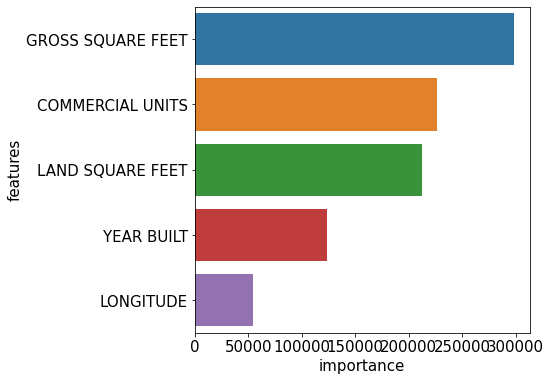

In [74]:
pred_staten = prediction(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                    'YEAR BUILT','LONGITUDE'])
test_staten = y_test(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                'YEAR BUILT','LONGITUDE'])
kfold_staten = kfold(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                                'YEAR BUILT','LONGITUDE'])

In [75]:
scaler = StandardScaler()
X=skewed_X(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET','COMMERCIAL UNITS',
                      'YEAR BUILT','LONGITUDE'])
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
y=dfstaten[[' SALE PRICE ']]
y = pd.DataFrame(scaler.fit_transform(y),columns=y.columns)
df=pd.concat([X,y],axis=1)
df.columns = ['gross_square_feet', 'land_square_feet','commercial_units',
              'year_built','longitude','sale_price']
# load the pandas dataframe as a R dataframe
pandas2ri.activate()
globalenv["df"] = df

In [76]:
# runs lm() model from rpy2
R = ro.r

rcode = """
fit5 <- lm('sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+longitude', data=df)
print (summary(fit5))
"""
R(rcode)


Call:
lm(formula = "sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+longitude", 
    data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-3.805 -0.175  0.009  0.178 33.592 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.021e-14  1.418e-02   0.000        1    
commercial_units   2.138e-01  1.502e-02  14.239  < 2e-16 ***
gross_square_feet  3.113e-01  1.758e-02  17.709  < 2e-16 ***
land_square_feet   1.797e-01  1.727e-02  10.403  < 2e-16 ***
year_built         1.050e-01  1.617e-02   6.494 9.54e-11 ***
longitude          5.861e-02  1.487e-02   3.941 8.26e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8499 on 3585 degrees of freedom
Multiple R-squared:  0.2788,	Adjusted R-squared:  0.2778 
F-statistic: 277.2 on 5 and 3585 DF,  p-value: < 2.2e-16



<rpy2.robjects.vectors.ListVector object at 0x7fbccb71b080> [RTYPES.VECSXP]
R classes: ('summary.lm',)
[LangSexpV..., LangSexpV..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp...]
  call: <class 'rpy2.robjects.language.LangVector'>
  Rlang( lm(formula = "sale_price~commercial_units+gross_square_feet+land_square_feet+year_built+longitude",  )
  terms: <class 'rpy2.robjects.Formula'>
  <rpy2.robjects.Formula object at 0x7fbccce1bd00> [RTYPES.LANGSXP]
R classes: ('terms', 'formula')
  residuals: <class 'numpy.ndarray'>
  array([-0.54394638, -0.63803893,  0.37132273, ..., -0.29155189,
        0.05197818, -0.23296758])
  coefficients: <class 'numpy.ndarray'>
  array([[-1.02139609e-14,  1.41831271e-02, -7.20148722e-13,
         1.00000000e+00],
       [ 2.13839979e-01,  1.50183233e-02,  1.42386054e+01,
         8.59190216e-45],
       [ 3.11313993e-01,  1.75798291e-02,  1.77085904e+01,
         2.45323025e-67],
       [ 1.79687769e-01,  1.72728803e-02,  1.04028839e+01,
         5.43662552e-25],
       [ 1.04980696e-01,  1.61669867e-02,  6.49352277e+00,
         9.53795838e-11],
       [ 5.86079525e-02,  1.48703924e-02,  3.94125124e+00,
         8.26037448e-05]])
...
  sigma: <class 'numpy.ndarray'>
  array([0.27883747])
  df: <class 'numpy.ndarray'>
  array([0.27783167])
  r.squared: <class 'numpy.ndarray'>
  array([ 277.2280309,    5.       , 3585.       ])
  adj.r.squared: <class 'numpy.ndarray'>
  array([[ 2.78473963e-04,  2.92098218e-18, -2.66971959e-18,
        -3.52032159e-18, -1.39272492e-17, -4.77788556e-17],
       [ 2.92098218e-18,  3.12236378e-04, -1.03701474e-04,
         1.47527420e-05,  4.56384910e-05, -2.50382305e-05],
       [-2.66971959e-18, -1.03701474e-04,  4.27828686e-04,
        -2.14741061e-04, -1.23959118e-04,  2.20633573e-05],
       [-3.52032159e-18,  1.47527420e-05, -2.14741061e-04,
         4.13019095e-04,  1.44548476e-04,  1.75014089e-05],
       [-1.39272492e-17,  4.56384910e-05, -1.23959118e-04,
         1.44548476e-04,  3.61825163e-04,  8.29191649e-05],
       [-4.77788556e-17, -2.50382305e-05,  2.20633573e-05,
         1.75014089e-05,  8.29191649e-05,  3.06115599e-04]])

In [77]:
# function to get predicted data for each borough
def pred_dataset(pred_borough, test_borough, i):
    df = pd.DataFrame(pred_borough, columns=['PREDICTION'])
    df['ID'] = range(1,(len(test_borough)+1))
    test_borough['ID'] = range(1,(len(test_borough)+1))
    df_all = df.merge(test_borough, on='ID')
    dfborough = df2000[df2000['BOROUGH']==i]
    map_data = df_all.merge(dfborough, on = ' SALE PRICE ')
    map_data = map_data.drop_duplicates()
    return map_data

In [78]:
datamanhattan = pred_dataset(pred_manhattan,test_manhattan, 1)
databronx = pred_dataset(pred_bronx,test_bronx, 2)
databrooklyn = pred_dataset(pred_brooklyn,test_brooklyn, 3)
dataqueens = pred_dataset(pred_queens,test_queens, 4)
datastaten = pred_dataset(pred_staten,test_staten, 5)

In [79]:
# merge predicted data of test dataset for 5 boroughs
map_data = pd.concat([datamanhattan,databronx], axis=0)
map_data = pd.concat([map_data,databrooklyn], axis=0)
map_data = pd.concat([map_data,dataqueens], axis=0)
map_data = pd.concat([map_data,datastaten], axis=0)

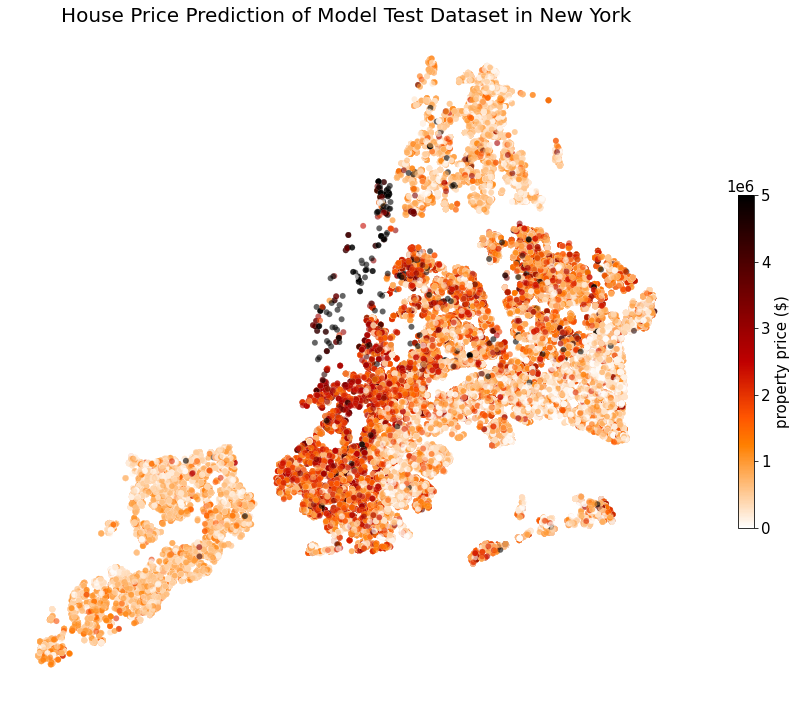

In [80]:
# plot the prediction of housing price in test dataset
gdf = gpd.GeoDataFrame(map_data, 
                       geometry=gpd.points_from_xy(map_data.LONGITUDE, map_data.LATITUDE))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs("EPSG:32118")
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='PREDICTION', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price Prediction of Model Test Dataset in New York",fontsize= 20)

ax.set_axis_off()
fig.tight_layout()

fig.savefig('map/house price prediction.pdf')

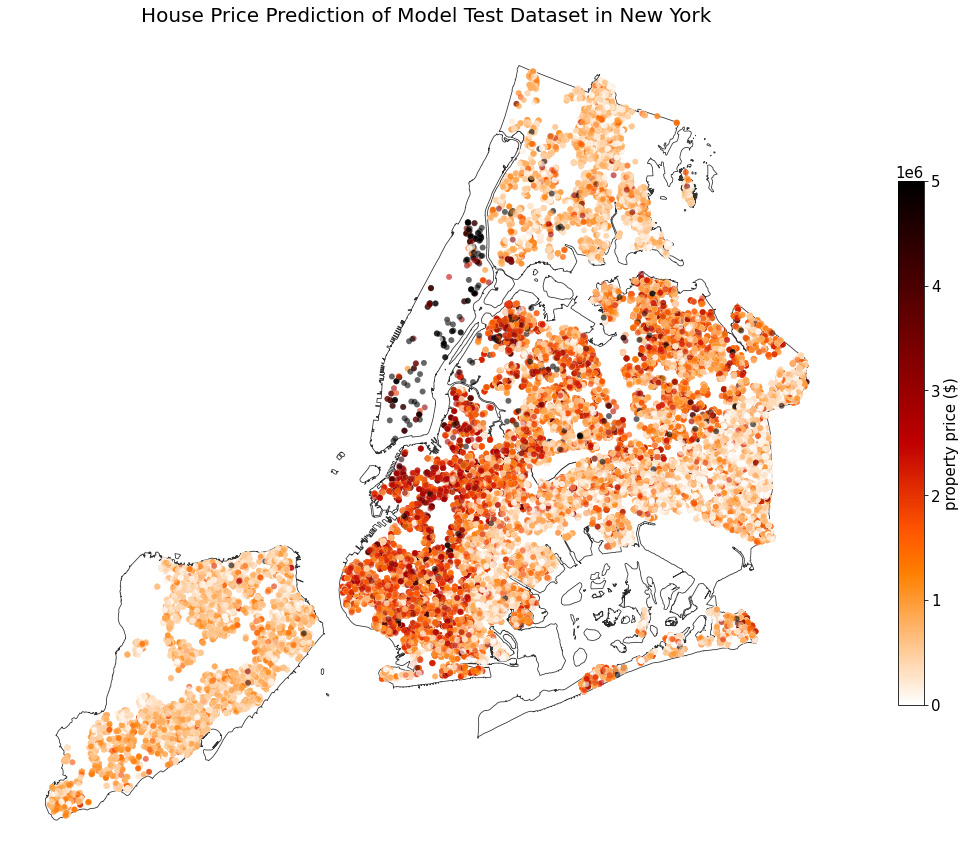

In [81]:
# add boundary
gdfhouse =gdf.copy()

# Set up the matplotlib figure
matplotlib.rcParams['font.size'] = 15

# set an empty fig and axis 
fig,ax = plt.subplots(1,1,figsize=[15,15])

gdfnybb = gpd.GeoDataFrame(nybb)
gdfnybb = gdfnybb.to_crs("EPSG:32118")
boundplot=gdfnybb.plot(figsize=(10, 10), alpha=0.8, linewidth=0.8,
                   edgecolor='black',ax=ax,
                   color = 'white')
houseplot=gdfhouse.plot(figsize=(10, 10), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column='PREDICTION', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price Prediction of Model Test Dataset in New York",fontsize= 20)

ax.set_axis_off()
fig.tight_layout()

fig.savefig('map/house price prediction.png', bbox_inches='tight', pad_inches=0, dpi=300)

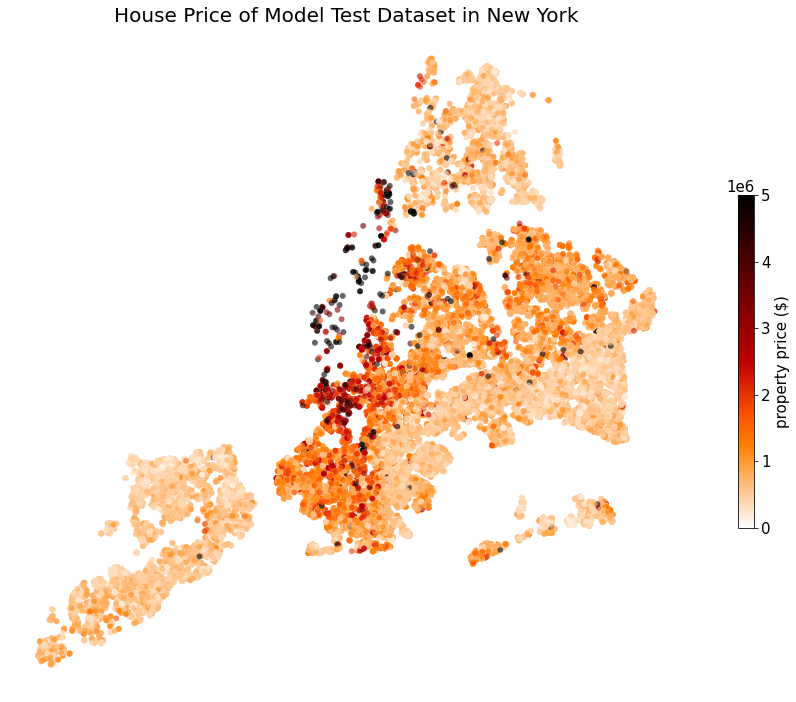

In [82]:
# plot the original test dataset to make comparison
gdf = gpd.GeoDataFrame(map_data, 
                       geometry=gpd.points_from_xy(map_data.LONGITUDE, map_data.LATITUDE))
gdf =gdf.set_crs(epsg=4326)
gdf =gdf.to_crs("EPSG:32118")
fig,ax=plt.subplots(figsize=(15, 10))
houseplot=gdf.plot(figsize=(8, 8), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column=' SALE PRICE ', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price of Model Test Dataset in New York",fontsize= 20)

# this removes the axis
ax.set_axis_off()

# this tightens the layout
fig.tight_layout()

fig.savefig('map/house price test dataset.pdf')

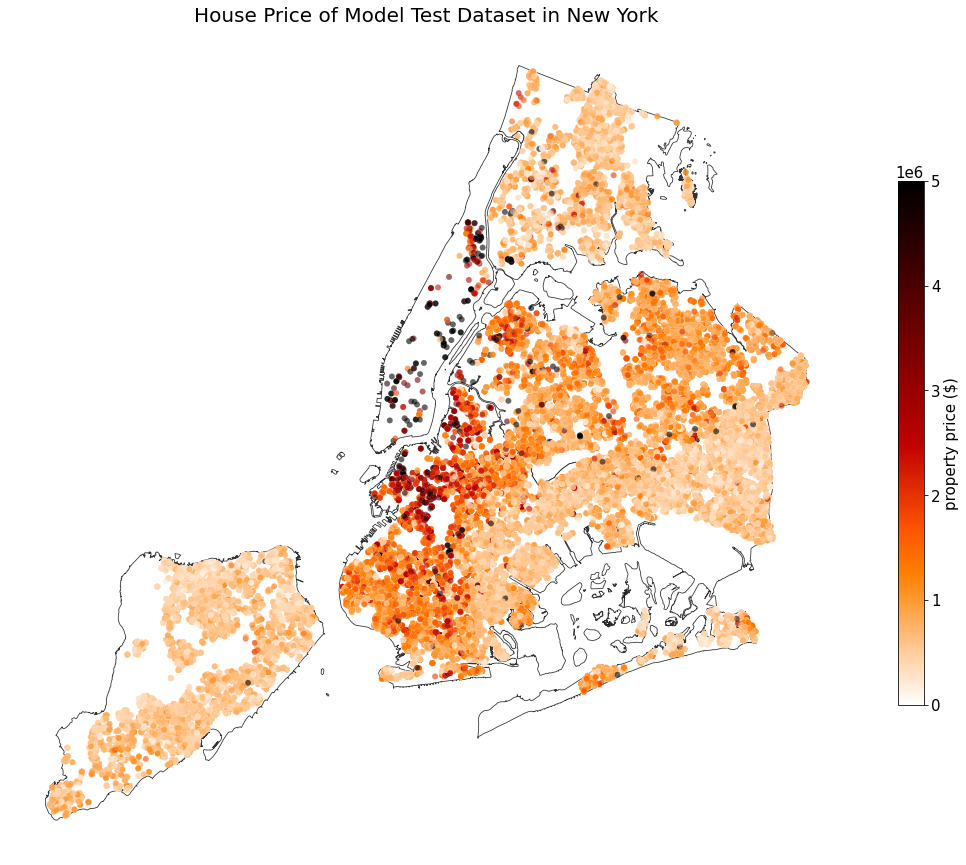

In [83]:
# add boundary
gdfhouse =gdf.copy()

# Set up the matplotlib figure
matplotlib.rcParams['font.size'] = 15

# set an empty fig and axis 
fig,ax = plt.subplots(1,1,figsize=[15,15])

gdfnybb = gpd.GeoDataFrame(nybb)
gdfnybb = gdfnybb.to_crs("EPSG:32118")
boundplot=gdfnybb.plot(figsize=(10, 10), alpha=0.8, linewidth=0.8,
                   edgecolor='black',ax=ax,
                   color = 'white')
houseplot=gdfhouse.plot(figsize=(10, 10), alpha=0.6, linewidth=0.1,
                edgecolor='w',ax=ax,
                column=' SALE PRICE ', colormap = 'gist_heat_r',legend=True,vmin=0,vmax=5000000,
                legend_kwds={'label': "property price ($)",'shrink': 0.5})
ax.set_title("House Price of Model Test Dataset in New York",fontsize= 20)

ax.set_axis_off()
fig.tight_layout()

fig.savefig('map/house price test dataset.png', bbox_inches='tight', pad_inches=0, dpi=300)

## 4. Conduct one of the following;
### 4a. Second Regression model
    * construct a second regression model (eg. model of your choice) where the target is the predicted sale price. 
    * compare the results of the linear regression model results with the second regression model on a random holdout testset.
    * report the results
    
### 4b. Principal Component Regression model
    * apply PCA analysis to find sets of uncorrelated features. 
    * train a principal component regression model where the target is the predicted sale price. 
    * compare the results between the linear regression model results with the principal component regression results on a random holdout testset. 
    * report the results

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [85]:
# function for pca analysis
def pca_boro(dfborough, variables):

    X = dfborough[variables]
    y = dfborough[[' SALE PRICE ']]
    
    numeric_data=X.select_dtypes(include=[np.number])
    skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))   
    skewed = skewed[(skewed > 0.75)]
    skewed = skewed.index
    X[skewed] = np.log1p(X[skewed])
    
    # component/feature representation
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(X)
    #inv_x = scaler.inverse_transform(scaled_x)
    n=int((scaled_x.shape[1]))
    pca = PCA(n_components=n)
    X_proj = pca.fit_transform(scaled_x)
    principalComponents = X_proj
    principalDf = pd.DataFrame(data = principalComponents)
    return pca

In [102]:
# function to get pca dataframe containing variance; histogram & save
def pcadf_p(dfborough, variables,boroname):
 
    X = dfborough[variables]
    y = dfborough[[' SALE PRICE ']]
    
    numeric_data=X.select_dtypes(include=[np.number])
    skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))   
    skewed = skewed[(skewed > 0.75)]
    skewed = skewed.index
    X[skewed] = np.log1p(X[skewed])
    
    # component/feature representation
    scaler = StandardScaler()
    scaled_x = scaler.fit_transform(X)
    #inv_x = scaler.inverse_transform(scaled_x)
    n=int((scaled_x.shape[1]))
    pca = PCA(n_components=n)
    X_proj = pca.fit_transform(scaled_x)
    principalComponents = X_proj
    principalDf = pd.DataFrame(data = principalComponents)
    pcadf=principalDf
    response=list(range(n))
    # visualize multi-variance
    fig,ax = plt.subplots(1,1,figsize=[8,5])
    bar = plt.bar(response, pca.explained_variance_ratio_, color='black', alpha = 0.9)
    for a, b in zip(response, pca.explained_variance_ratio_):
        plt.text(a, b + 0.00, '%.2f' % b, ha='center', va='bottom', fontsize=15)
    plt.title(boroname)
    plt.xlabel('PCA Component')
    plt.ylabel('variance %')
    plt.xticks(range(len(response)), ['1st','2nd','3rd','4th','5th','6th'][:(len(response))])
    plt.savefig('map/percent_{}.pdf'.format(boroname))
    pcadf_p=pcadf[response]

    
    return pcadf_p


In [103]:
# plot the matshow; show influence of each variable
def matshow(boroname,pca,variables,i,n,name, capital):
    matshow = plt.matshow(pca.components_[:i],cmap='viridis',vmin=-0.6, vmax=0.6)
    plt.yticks(n,name,fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(variables)),capital,rotation=0)
    plt.title(boroname +'\n')
    plt.tight_layout()
    plt.savefig('map/matshow_{}.pdf'.format(boroname))
    plt.show()
    
    return matshow

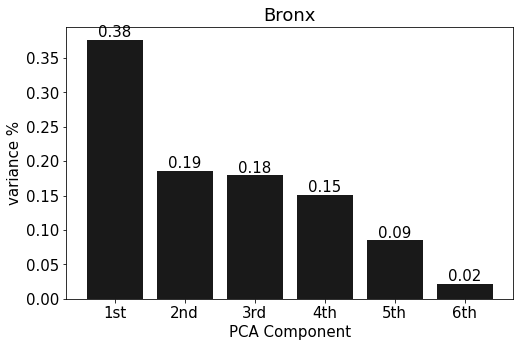

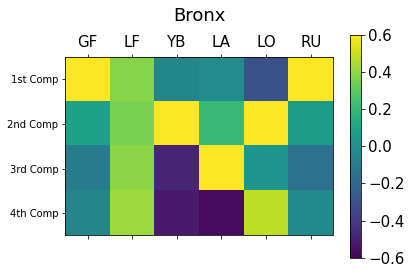

In [104]:
pca_bronx = pca_boro(dfbronx, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                               'YEAR BUILT','LATITUDE','LONGITUDE','RESIDENTIAL UNITS'])
pcadf_bronx = pcadf_p(dfbronx, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                'YEAR BUILT','LATITUDE','LONGITUDE','RESIDENTIAL UNITS'],'Bronx')
matshow = matshow('Bronx',pca_bronx, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                      'YEAR BUILT','LATITUDE','LONGITUDE','RESIDENTIAL UNITS'],4,
              [0,1,2,3], ['1st Comp','2nd Comp','3rd Comp','4th Comp'],['GF','LF','YB','LA','LO','RU'])

0th RMSE: 968772.2447537049
0th R2: 0.5448919470773098
1th RMSE: 969072.0536712714
1th R2: 0.5446102161203011
2th RMSE: 965268.0381608721
2th R2: 0.5481783920308949
3th RMSE: 961844.6638547853
3th R2: 0.5513775276060897
4th RMSE: 947932.991152793
4th R2: 0.5642610110520316
5th RMSE: 944625.006190266
5th R2: 0.5672968859313514


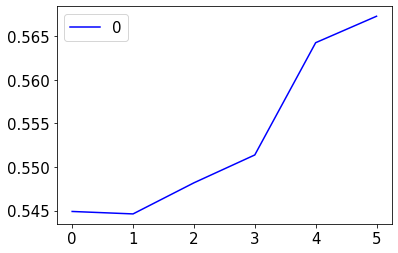

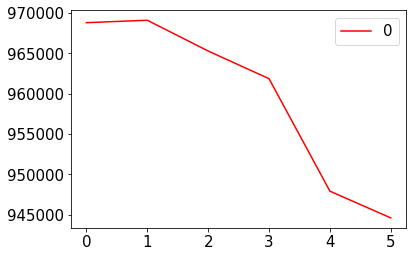

In [105]:
# merge the pca features back to the dataframe
X = skewed_X(dfbronx, ['RESIDENTIAL UNITS',
                       'GROSS SQUARE FEET','LAND SQUARE FEET',
                       'YEAR BUILT','LATITUDE','LONGITUDE'])
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X = X.reset_index(drop=True)
X = pd.concat([X,pcadf_bronx],axis=1)
y = dfbronx[[' SALE PRICE ']]

# conduct principal component linear regression analysisand store the results for each successive components.
n=int((scaled_X.shape[1]))
var=[]
r2=[]
rmse=[]
for i in np.arange(0,n,1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(X[var], y, train_size=0.7, random_state=1)
    #print (var)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    print (f'{i}th RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')
    print (f'{i}th R2: {r2_score(y_test,y_pred)}')
# report the r2 and mse in a plot
pd.DataFrame(r2).plot(c='blue')
plt.show()
pd.DataFrame(rmse).plot(c='red')
plt.show()

In [106]:
def matshow(boroname,pca,variables,i,n,name, capital):
    matshow=plt.matshow(pca.components_[:i],cmap='viridis',vmin=-0.6, vmax=0.6)
    plt.yticks(n,name,fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(variables)),capital,rotation=0)
    plt.title(boroname +'\n')
    plt.tight_layout()
    plt.savefig('map/matshow_{}.pdf'.format(boroname))
    plt.show()
    
    return matshow

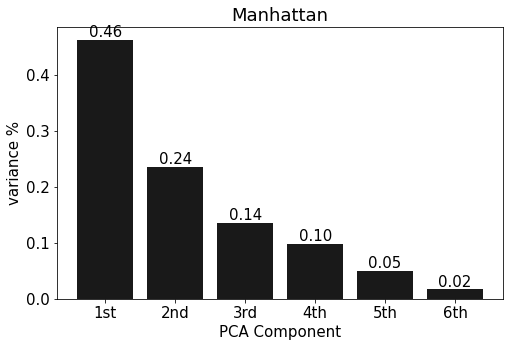

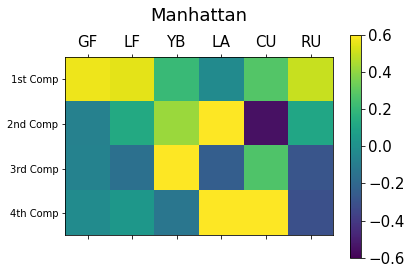

In [107]:
pca_manhattan = pca_boro(dfmanhattan, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                       'YEAR BUILT','LATITUDE',
                                       'COMMERCIAL UNITS','RESIDENTIAL UNITS'])
pcadf_manhattan = pcadf_p(dfmanhattan, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                        'YEAR BUILT','LATITUDE',
                                        'COMMERCIAL UNITS','RESIDENTIAL UNITS'],'Manhattan')
matshow = matshow('Manhattan', pca_manhattan, 
                  ['GROSS SQUARE FEET','LAND SQUARE FEET',
                   'YEAR BUILT','LATITUDE',
                   'COMMERCIAL UNITS','RESIDENTIAL UNITS'],
                  4,[0,1,2,3], ['1st Comp','2nd Comp','3rd Comp','4th Comp'],
                  ['GF','LF','YB','LA','CU','RU'])

0th RMSE: 5007021.596529978
0th R2: 0.30464963186241134
1th RMSE: 5217261.338177517
1th R2: 0.24502956853442126
2th RMSE: 5228956.2220839625
2th R2: 0.24164112899246148
3th RMSE: 5020201.71712427
3th R2: 0.30098403389757
4th RMSE: 4799815.3857868565
4th R2: 0.3610103456314252
5th RMSE: 4667369.381289192
5th R2: 0.3957883353114502


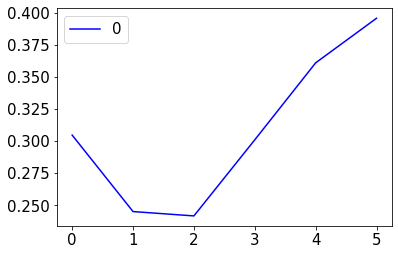

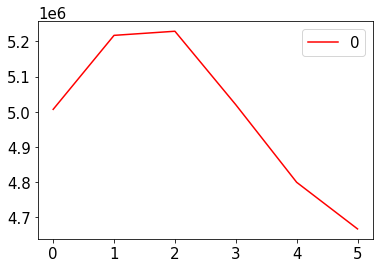

In [108]:
# merge the pca features back to the dataframe
X = skewed_X(dfmanhattan, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                           'YEAR BUILT','LATITUDE',
                           'COMMERCIAL UNITS','RESIDENTIAL UNITS'])
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X = X.reset_index(drop=True)
X = pd.concat([X,pcadf_manhattan],axis=1)
y = dfmanhattan[[' SALE PRICE ']]

# conduct principal component linear regression analysisand store the results for each successive components.
n=int((scaled_X.shape[1]))
var=[]
r2=[]
rmse=[]
for i in np.arange(0,n,1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(X[var], y, train_size=0.7, random_state=1)
    #print (var)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    print (f'{i}th RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')
    print (f'{i}th R2: {r2_score(y_test,y_pred)}')
# report the r2 and mse in a plot
pd.DataFrame(r2).plot(c='blue')
plt.show()
pd.DataFrame(rmse).plot(c='red')
plt.show()

In [109]:
def matshow(boroname,pca,variables,i,n,name, capital):
    matshow=plt.matshow(pca.components_[:i],cmap='viridis',vmin=-0.6, vmax=0.6)
    plt.yticks(n,name,fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(variables)),capital,rotation=0)
    plt.title(boroname +'\n')
    plt.tight_layout()
    plt.savefig('map/matshow_{}.pdf'.format(boroname))
    plt.show()
    
    return matshow

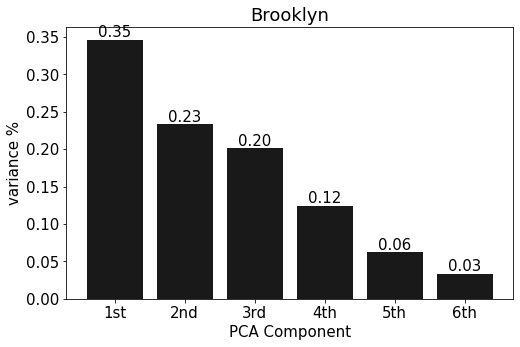

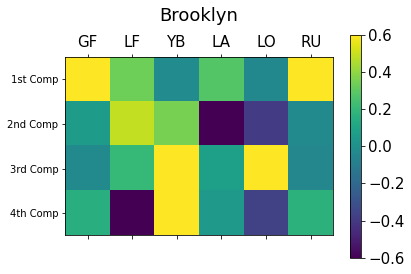

In [110]:
pca_brooklyn = pca_boro(dfbrooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                     'YEAR BUILT','LATITUDE','LONGITUDE',
                                     'RESIDENTIAL UNITS'])
pcadf_brooklyn = pcadf_p(dfbrooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                      'YEAR BUILT','LATITUDE','LONGITUDE',
                                      'RESIDENTIAL UNITS'], 'Brooklyn')
matshow = matshow('Brooklyn',pca_brooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                            'YEAR BUILT','LATITUDE','LONGITUDE','RESIDENTIAL UNITS'],
                  4,[0,1,2,3], ['1st Comp','2nd Comp','3rd Comp','4th Comp'],
                  ['GF','LF','YB','LA','LO','RU'])

0th RMSE: 1080236.6117433985
0th R2: 0.32352949566514666
1th RMSE: 1086495.0397457299
1th R2: 0.3156684292015629
2th RMSE: 1069949.66606497
2th R2: 0.33635202238197426
3th RMSE: 1066736.2246532377
3th R2: 0.34033238050654124
4th RMSE: 1049252.220683304
4th R2: 0.3617793171325586
5th RMSE: 1054811.299422134
5th R2: 0.35499864489057265


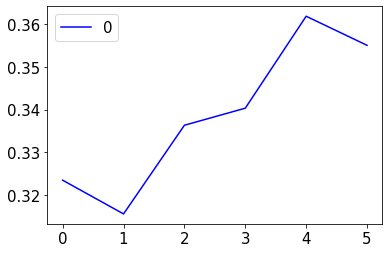

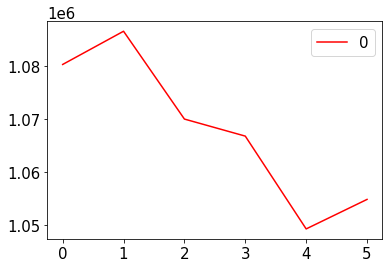

In [111]:
# merge the pca features back to the dataframe
X = skewed_X(dfbrooklyn, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                          'YEAR BUILT','LATITUDE','LONGITUDE',
                          'RESIDENTIAL UNITS'])
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X = X.reset_index(drop=True)
X = pd.concat([X,pcadf_brooklyn],axis=1)
y = dfbrooklyn[[' SALE PRICE ']]

# conduct principal component linear regression analysisand store the results for each successive components.
n=int((scaled_X.shape[1]))
var=[]
r2=[]
rmse=[]
for i in np.arange(0,n,1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(X[var], y, train_size=0.7, random_state=1)
    #print (var)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    print (f'{i}th RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')
    print (f'{i}th R2: {r2_score(y_test,y_pred)}')
# report the r2 and mse in a plot
pd.DataFrame(r2).plot(c='blue')
plt.show()
pd.DataFrame(rmse).plot(c='red')
plt.show()

In [112]:
def matshow(boroname,pca,variables,i,n,name, capital):
    matshow=plt.matshow(pca.components_[:i],cmap='viridis',vmin=-0.6, vmax=0.6)
    plt.yticks(n,name,fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(variables)),capital,rotation=0)
    plt.title(boroname +'\n')
    plt.tight_layout()
    plt.savefig('map/matshow_{}.pdf'.format(boroname))
    plt.show()
    
    return matshow

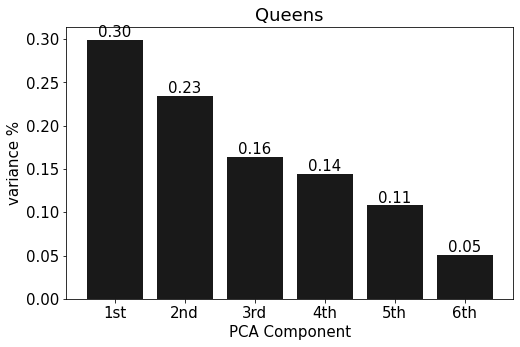

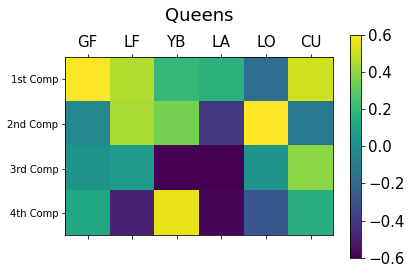

In [113]:
pca_queens = pca_boro(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                 'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'])
pcadf_queens = pcadf_p(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                  'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'],'Queens')

matshow = matshow('Queens',pca_queens, 
                  ['GROSS SQUARE FEET','LAND SQUARE FEET',
                   'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'],
                  4,[0,1,2,3], ['1st Comp','2nd Comp','3rd Comp','4th Comp'],
                  ['GF','LF','YB','LA','LO','CU'])

0th RMSE: 2084407.9586191925
0th R2: 0.34010027998754666
1th RMSE: 2084881.6634877848
1th R2: 0.3398003068181761
2th RMSE: 2080203.8702302782
2th R2: 0.3427595281345377
3th RMSE: 2070409.1869682292
3th R2: 0.34893421791208545
4th RMSE: 2032214.718104981
4th R2: 0.37273409312469474
5th RMSE: 2033289.4761682043
5th R2: 0.37207044537798384


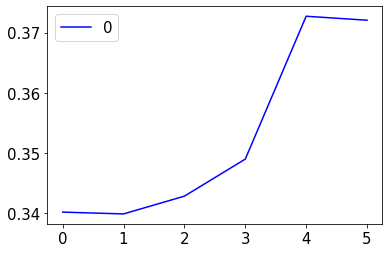

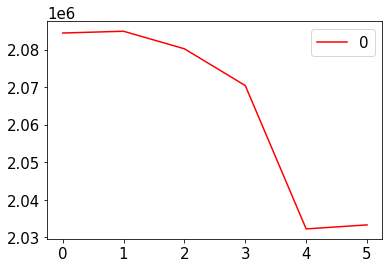

In [114]:
# merge the pca features back to the dataframe
X = skewed_X(dfqueens, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                        'YEAR BUILT','LATITUDE','LONGITUDE','COMMERCIAL UNITS'])
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X = X.reset_index(drop=True)
X = pd.concat([X,pcadf_queens],axis=1)
y = dfqueens[[' SALE PRICE ']]

# conduct principal component linear regression analysisand store the results for each successive components.
n=int((scaled_X.shape[1]))
var=[]
r2=[]
rmse=[]
for i in np.arange(0,n,1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(X[var], y, train_size=0.7, random_state=1)
    #print (var)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    print (f'{i}th RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')
    print (f'{i}th R2: {r2_score(y_test,y_pred)}')
# report the r2 and mse in a plot
pd.DataFrame(r2).plot(c='blue')
plt.show()
pd.DataFrame(rmse).plot(c='red')
plt.show()

In [115]:
def matshow(boroname,pca,variables,i,n,name, capital):
    matshow=plt.matshow(pca.components_[:i],cmap='viridis',vmin=-0.6, vmax=0.6)
    plt.yticks(n,name,fontsize=10)
    plt.colorbar()
    plt.xticks(range(len(variables)),capital,rotation=0)
    plt.title(boroname +'\n')
    plt.tight_layout()
    plt.savefig('map/matshow_{}.pdf'.format(boroname))
    plt.show()
    
    return matshow

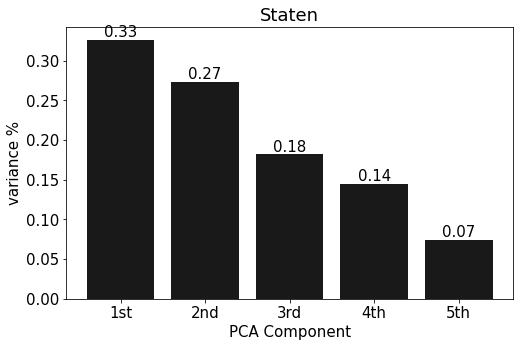

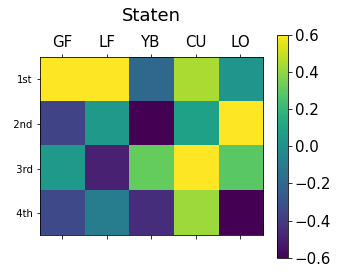

In [116]:
pca_staten = pca_boro(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                 'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'])

pcadf_staten = pcadf_p(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                                  'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'],'Staten')
matshow = matshow('Staten',pca_staten, 
                  ['GROSS SQUARE FEET','LAND SQUARE FEET',
                   'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'],
                  4,[0,1,2,3], ['1st','  2nd','  3rd','  4th'],
                  ['GF','LF','YB','CU','LO'])

0th RMSE: 1165861.3484720073
0th R2: 0.14287966065910795
1th RMSE: 1157919.3519812743
1th R2: 0.15451751248217782
2th RMSE: 1148182.908581423
2th R2: 0.1686763271494146
3th RMSE: 1142402.1318606804
3th R2: 0.17702621432693388
4th RMSE: 1143988.2872589326
4th R2: 0.17473933042583178


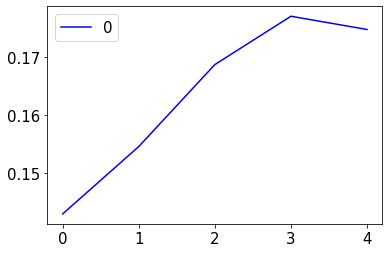

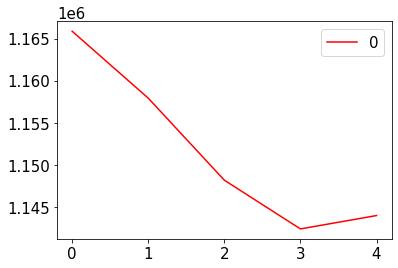

In [117]:
# merge the pca features back to the dataframe
X = skewed_X(dfstaten, ['GROSS SQUARE FEET','LAND SQUARE FEET',
                        'YEAR BUILT','COMMERCIAL UNITS','LONGITUDE'])
scaled_X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X = X.reset_index(drop=True)
X = pd.concat([X,pcadf_staten],axis=1)
y = dfstaten[[' SALE PRICE ']]

# conduct principal component linear regression analysisand store the results for each successive components.
n=int((scaled_X.shape[1]))
var=[]
r2=[]
rmse=[]
for i in np.arange(0,n,1):
    var.append(i)
    (X_train, X_test, y_train, y_test) = train_test_split(X[var], y, train_size=0.7, random_state=1)
    #print (var)
    model=LinearRegression()
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    rmse.append(mean_squared_error(y_test,y_pred,squared=False))
    print (f'{i}th RMSE: {mean_squared_error(y_test,y_pred,squared=False)}')
    print (f'{i}th R2: {r2_score(y_test,y_pred)}')
# report the r2 and mse in a plot
pd.DataFrame(r2).plot(c='blue')
plt.show()
pd.DataFrame(rmse).plot(c='red')
plt.show()